## Cryptocurrency and Social Media: Source Code
Team Members: Mhai Kunchorn, Noor Syed, Margaret Onakoya    
August 2021

#### Source Code Format
* For code examples which are the same or not materially different, one example is provided as representative of team member steps. Where code is materially unique or provides a good example of how different methods can provide similar results, code is provided per asset.
* CSV saves are updated to version 1 in order to preserve the original CSV file to read from, based on the time period the data was originally created and explored, as API will generate newer data.

#### Cryptocurrency Assets Analyzed   

Bitcoin - <span style='color:Blue'>BTC</span>  
Ethereum - <span style='color:Blue'>ETH</span>      
Stellar - <span style='color:Blue'>XLM</span>    
Dogecoin - <span style='color:Blue'>DOGE</span>

### Importing Libraries
Consolidation of all library packages in use for code runs. This way imports only need to be ran once and can be used through the rest of the notebook, without slowing down runs by importing for each use.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas_datareader as pdr
import json
import requests
import urllib.request
import seaborn as sns
import cufflinks as cf
import plotly.offline as pylo
pylo.init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
from pprint import pprint
from pandas.io.json import json_normalize

### Importing Data
* API used is LunarCrush at [LunarCrush API](https://lunarcrush.com/developers/docs#). After exploring different URLs with inline documentation on the website, the Assets category URL was determined to provide the most relevant data, as it included daily price and social media information.
* The URL was modified per API documentation to show daily changes for two years, as 720 data points is the maximum data points the API can support.
* URL is pulled into a URL dataframe and read via urllib.request library to view the data and check as first step that it includes required data points.
* A V2 API key is generated for authenticating the requests associated with the project for usage and billing purposes.
* Here we are requesting data on assets for details, overall metrics, and time series metrics for one or multiple assets. We refer to all supported cryptocurrencies as assets.
* Assets have an associated symbol (ticker).
* The change intervals metric we are looking at is daily over 2 years.

In [121]:
url = "https://api.lunarcrush.com/v2?data=assets&key=yukd41svc8pw3qq0rv0nvi&symbol=DOGE&data_points=720&interval=day&change=1d,2y"

In [122]:
r = requests.get(url) # Loading the data from API by making a GET request from an API endpoint, LunarCrush.
r # ensuring the response code indicates a successful request <Response [200]>

<Response [200]>

### Extracting Data

In [123]:
json = r.json() # Extracting data from the request using Json() method
json

{'config': {'change': '1d,2y',
  'data': 'assets',
  'data_points': 720,
  'interval': 'day',
  'symbol': "'DOGE'"},
 'usage': {'day': 6, 'month': 28},
 'data': [{'id': 29,
   'name': 'Dogecoin',
   'symbol': 'DOGE',
   'price': 0.31968219,
   'price_btc': 6.484966488478e-06,
   'market_cap': 41862388553,
   'percent_change_24h': -1.57,
   'percent_change_7d': 8.91,
   'percent_change_30d': 66.68,
   'volume_24h': 4013043715.15,
   'max_supply': '',
   'timeSeries': [{'asset_id': 29,
     'time': 1567382400,
     'open': 0.002612,
     'close': 0.002587,
     'high': 0.002657,
     'low': 0.002559,
     'volume': 16769667,
     'market_cap': None,
     'url_shares': 1,
     'unique_url_shares': 1,
     'reddit_posts': 7,
     'reddit_posts_score': 361,
     'reddit_comments': 22,
     'reddit_comments_score': 41,
     'tweets': 529,
     'tweet_spam': 171,
     'tweet_followers': None,
     'tweet_quotes': None,
     'tweet_retweets': None,
     'tweet_replies': None,
     'tweet_favor

* URL is pulled into json dataframe using json and requests library to view it in a more user friendly format to see breakdown of lists and dictionaries within the data.
* Json keys and type functions are then called to get a better understanding of the different components of the data and to view what type of data is within the dataset, to better understand how and if we can transform it to be a useful dataset.
* It's identified that the key information is within the 'data' dictionary key and that the data is made up of dictionaries within a list
* Dataframe is run to view 'data' information for a closer look

#### Checking to see which is the best key to transform into a DataFrame

In [17]:
json.keys()

dict_keys(['config', 'usage', 'data'])

In [14]:
json['config'] # Not enough relevant information

{'change': '1d,2y',
 'data': 'assets',
 'data_points': '720',
 'interval': 'day',
 'symbol': "'DOGE'"}

In [15]:
json['usage'] # Not enough relevant information

{'day': 4, 'month': 26}

In [124]:
json['data'] # This key contains the information we want to analyze further

[{'id': 29,
  'name': 'Dogecoin',
  'symbol': 'DOGE',
  'price': 0.31968219,
  'price_btc': 6.484966488478e-06,
  'market_cap': 41862388553,
  'percent_change_24h': -1.57,
  'percent_change_7d': 8.91,
  'percent_change_30d': 66.68,
  'volume_24h': 4013043715.15,
  'max_supply': '',
  'timeSeries': [{'asset_id': 29,
    'time': 1567382400,
    'open': 0.002612,
    'close': 0.002587,
    'high': 0.002657,
    'low': 0.002559,
    'volume': 16769667,
    'market_cap': None,
    'url_shares': 1,
    'unique_url_shares': 1,
    'reddit_posts': 7,
    'reddit_posts_score': 361,
    'reddit_comments': 22,
    'reddit_comments_score': 41,
    'tweets': 529,
    'tweet_spam': 171,
    'tweet_followers': None,
    'tweet_quotes': None,
    'tweet_retweets': None,
    'tweet_replies': None,
    'tweet_favorites': None,
    'tweet_sentiment1': 2,
    'tweet_sentiment2': 71,
    'tweet_sentiment3': 65,
    'tweet_sentiment4': 112,
    'tweet_sentiment5': 112,
    'tweet_sentiment_impact1': 2390,
 

#### Checking the class type of chosen key to ensure it can translate to a dataframe

In [10]:
type(json['data']) # A list

list

#### Applying index to check what 'data' is in the list

In [11]:
type(json['data'][0]) # A list of dictionaries

dict

#### Transforming data into a Pandas dataframe

In [125]:
doge_df = pd.DataFrame(json['data']) # create dataframe using key dataset within API data
doge_df

id      name symbol     price  price_btc   market_cap  percent_change_24h  \
0  29  Dogecoin   DOGE  0.319682   0.000006  41862388553               -1.57   

   percent_change_7d  percent_change_30d    volume_24h  ...  \
0               8.91               66.68  4.013044e+09  ...   

  market_dominance_1d market_dominance_1d_previous  \
0            1.847001                      1.94948   

   market_dominance_1d_percent_change  close_2y  close_2y_percent_change  \
0                           -3.138906  0.319682             11927.170429   

   social_volume_global_2y  social_volume_global_2y_previous  \
0                364440976                            343160   

   market_dominance_2y  market_dominance_2y_previous  \
0             1.846856                          None   

   market_dominance_2y_percent_change  
0                                None  

[1 rows x 230 columns]

* New dataframe is created with just the list from the API pull that has our key information
* *Panic!* Why is there only one line? We are expecting daily data with multiple rows
* After reviewing our json['data'], it looks that more information is held within timeSeries, which is not shown on our latest dataframe
* Dataframe is sliced to view more columns and it shows the timeSeries cell has list with more data

In [127]:
doge_df.iloc[:, 8:13] # slice dataframe to view column with underlying data

percent_change_30d    volume_24h max_supply  \
0               66.68  4.013044e+09              

                                          timeSeries  \
0  [{'asset_id': 29, 'time': 1567382400, 'open': ...   

   social_dominance_calc_24h_previous  
0                                   0

### Normalizing Data
* New dataframe created to just pull the timeSeries column of data
* New dataframe created using explode function to explode out the timeSeries dataframe, which pulls each dictionary as a new row
* We then need to use the pandas normalize function to create a normalized dataframe, which has pulled out all our information into columns and rows
* Alternatively, we can use append method and for loop to pull just ['data'] key and normalize it

#### Normalizing using explode method

In [128]:
time_series_df = pd.DataFrame(doge_df['timeSeries']) # create dataframe for column with underlying data
time_series_df

timeSeries
0  [{'asset_id': 29, 'time': 1567382400, 'open': ...

In [129]:
ts_exp_df = time_series_df.explode('timeSeries') # explode the dataframe to break out into rows
ts_exp_df.head()

timeSeries
0  {'asset_id': 29, 'time': 1567382400, 'open': 0...
0  {'asset_id': 29, 'time': 1567468800, 'open': 0...
0  {'asset_id': 29, 'time': 1567555200, 'open': 0...
0  {'asset_id': 29, 'time': 1567641600, 'open': 0...
0  {'asset_id': 29, 'time': 1567728000, 'open': 0...

In [130]:
normalized_df = pd.json_normalize(ts_exp_df['timeSeries']) 
normalized_df.head() # normalize data into a readable dataset with columns and rows for further analysis

asset_id        time      open     close      high       low      volume  \
0        29  1567382400  0.002612  0.002587  0.002657  0.002559  16769667.0   
1        29  1567468800  0.002647  0.002589  0.002660  0.002532  17925768.0   
2        29  1567555200  0.002577  0.002500  0.002601  0.002464  16212352.0   
3        29  1567641600  0.002527  0.002501  0.002551  0.002455  17545511.0   
4        29  1567728000  0.002410  0.002459  0.002504  0.002293  19441699.0   

   market_cap  url_shares  unique_url_shares  ...  medium  youtube  \
0         NaN         1.0                1.0  ...     NaN      NaN   
1         NaN         2.0                2.0  ...     NaN      NaN   
2         NaN         NaN                NaN  ...     NaN      NaN   
3         NaN         NaN                NaN  ...     NaN      NaN   
4         NaN         NaN                NaN  ...     NaN      NaN   

   social_contributors  social_volume     price_btc  social_volume_global  \
0                171.0            561  2.493632e-07                120150   
1                207.0            639  2.441899e-07                120085   
2                249.0            640  2.365786e-07                113061   
3                264.0            598  2.360836e-07                117822   
4                455.0            696  2.384594e-07                 97221   

   social_dominance  percent_change_24h  market_cap_global  market_dominance  
0          0.466916            4.525253                NaN               NaN  
1          0.532123            0.077310                NaN               NaN  
2          0.566066           -3.437621                NaN               NaN  
3          0.507545            0.040000                NaN               NaN  
4          0.715895           -1.679328                NaN               NaN  

[5 rows x 60 columns]

#### Normalizing using append method

In [131]:
lunar = []
for i in requests.get(url).json()['data']:
    lunar.append(i)

In [132]:
df = pd.DataFrame(lunar)
df

id      name symbol     price  price_btc   market_cap  percent_change_24h  \
0  29  Dogecoin   DOGE  0.319707   0.000006  41892804239                -1.5   

   percent_change_7d  percent_change_30d    volume_24h  ...  \
0               8.99                66.8  4.017948e+09  ...   

  market_dominance_1d market_dominance_1d_previous  \
0            1.848343                     1.949477   

   market_dominance_1d_percent_change  close_2y  close_2y_percent_change  \
0                           -3.215293  0.319707             11928.105719   

   social_volume_global_2y  social_volume_global_2y_previous  \
0                364440494                            343160   

   market_dominance_2y  market_dominance_2y_previous  \
0             1.846738                          None   

   market_dominance_2y_percent_change  
0                                None  

[1 rows x 230 columns]

In [133]:
df = pd.json_normalize(lunar, record_path='timeSeries')
df.head()

asset_id        time      open     close      high       low      volume  \
0        29  1567382400  0.002612  0.002587  0.002657  0.002559  16769667.0   
1        29  1567468800  0.002647  0.002589  0.002660  0.002532  17925768.0   
2        29  1567555200  0.002577  0.002500  0.002601  0.002464  16212352.0   
3        29  1567641600  0.002527  0.002501  0.002551  0.002455  17545511.0   
4        29  1567728000  0.002410  0.002459  0.002504  0.002293  19441699.0   

   market_cap  url_shares  unique_url_shares  ...  medium  youtube  \
0         NaN         1.0                1.0  ...     NaN      NaN   
1         NaN         2.0                2.0  ...     NaN      NaN   
2         NaN         NaN                NaN  ...     NaN      NaN   
3         NaN         NaN                NaN  ...     NaN      NaN   
4         NaN         NaN                NaN  ...     NaN      NaN   

   social_contributors  social_volume     price_btc  social_volume_global  \
0                171.0            561  2.493632e-07                120150   
1                207.0            639  2.441899e-07                120085   
2                249.0            640  2.365786e-07                113061   
3                264.0            598  2.360836e-07                117822   
4                455.0            696  2.384594e-07                 97221   

   social_dominance  percent_change_24h  market_cap_global  market_dominance  
0          0.466916            4.525253                NaN               NaN  
1          0.532123            0.077310                NaN               NaN  
2          0.566066           -3.437621                NaN               NaN  
3          0.507545            0.040000                NaN               NaN  
4          0.715895           -1.679328                NaN               NaN  

[5 rows x 60 columns]

### Cleaning Data
* Once the data is normalized, we check that it runs in a readable format with helpful data
* Time was not showing in a readable format, so we can use pandas datetime function to convert to dates
* Data is then saved down to be captured as readable csv

In [134]:
normalized_df['time'] = pd.to_datetime(normalized_df['time'], unit='s') # update date into readable format
normalized_df.head()

asset_id       time      open     close      high       low      volume  \
0        29 2019-09-02  0.002612  0.002587  0.002657  0.002559  16769667.0   
1        29 2019-09-03  0.002647  0.002589  0.002660  0.002532  17925768.0   
2        29 2019-09-04  0.002577  0.002500  0.002601  0.002464  16212352.0   
3        29 2019-09-05  0.002527  0.002501  0.002551  0.002455  17545511.0   
4        29 2019-09-06  0.002410  0.002459  0.002504  0.002293  19441699.0   

   market_cap  url_shares  unique_url_shares  ...  medium  youtube  \
0         NaN         1.0                1.0  ...     NaN      NaN   
1         NaN         2.0                2.0  ...     NaN      NaN   
2         NaN         NaN                NaN  ...     NaN      NaN   
3         NaN         NaN                NaN  ...     NaN      NaN   
4         NaN         NaN                NaN  ...     NaN      NaN   

   social_contributors  social_volume     price_btc  social_volume_global  \
0                171.0            561  2.493632e-07                120150   
1                207.0            639  2.441899e-07                120085   
2                249.0            640  2.365786e-07                113061   
3                264.0            598  2.360836e-07                117822   
4                455.0            696  2.384594e-07                 97221   

   social_dominance  percent_change_24h  market_cap_global  market_dominance  
0          0.466916            4.525253                NaN               NaN  
1          0.532123            0.077310                NaN               NaN  
2          0.566066           -3.437621                NaN               NaN  
3          0.507545            0.040000                NaN               NaN  
4          0.715895           -1.679328                NaN               NaN  

[5 rows x 60 columns]

In [135]:
normalized_df.to_csv('normalized_timeSeries1.csv',  date_format='%Y-%m-%d') # create csv

### Read CSV for all assets

In [41]:
df_doge = pd.read_csv("normalized_timeSeries.csv") # create dataframe to read csv
df_btc = pd.read_csv('BTC_GP_FINAL.csv')
df_eth = pd.read_csv('ETH_data.csv')
df_xlm = pd.read_csv('Stellar_data.csv')

### Data Review

#### Checking the dimension of the dataframe

In [137]:
df_btc.shape # This data set has 720 records and 61 features

(720, 61)

#### Checking the data types
* We can see here how many of each data type this DataFrame contains, 39 floating point numbers and 22 integers indicates our datatype are all numeric.

* We cannot directly put this pandas data into an array object. This is because the n-dimensional array object within the NumPy library requires all the values to have the same Data type. In this case, we would need to convert all the integers into floats. Arrays do not generally have column headings whereas a DataFrame does.

In [139]:
df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 61 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               720 non-null    int64  
 1   asset_id                 720 non-null    int64  
 2   time                     720 non-null    int64  
 3   open                     719 non-null    float64
 4   close                    719 non-null    float64
 5   high                     719 non-null    float64
 6   low                      719 non-null    float64
 7   volume                   719 non-null    float64
 8   market_cap               708 non-null    float64
 9   url_shares               720 non-null    int64  
 10  unique_url_shares        720 non-null    int64  
 11  reddit_posts             709 non-null    float64
 12  reddit_posts_score       709 non-null    float64
 13  reddit_comments          709 non-null    float64
 14  reddit_comments_score    7

#### Reviewing rows
To understand column names and the type of values within each columns. Such as Volume holding data to the exponent of up to 10 and there are NaN values in various columns which we will later deal with.

In [140]:
df_eth.head(10) # Sampling the first 10 rows of the DataFrame

Unnamed: 0  asset_id        time        open       close        high  \
0           0         2  1567123200  170.516295  168.712539  171.292238   
1           1         2  1567209600  168.880616  171.677485  173.667087   
2           2         2  1567296000  174.140086  171.249100  175.512912   
3           3         2  1567382400  180.456209  178.839933  183.431450   
4           4         2  1567468800  181.983666  178.752994  183.645035   
5           5         2  1567555200  178.347604  175.119607  179.765994   
6           6         2  1567641600  175.450721  174.213797  176.179796   
7           7         2  1567728000  170.118265  168.988506  171.766499   
8           8         2  1567814400  171.633387  178.177647  180.342675   
9           9         2  1567900800  177.167661  181.636385  183.087865   

          low        volume  market_cap  url_shares  ...  medium  youtube  \
0  167.617993  4.006375e+09         NaN          47  ...     NaN      NaN   
1  166.957907  3.895886e+09         NaN          16  ...     NaN      NaN   
2  170.417988  3.700476e+09         NaN          21  ...     NaN      NaN   
3  176.947281  4.489179e+09         NaN          21  ...     NaN      NaN   
4  176.580137  4.481692e+09         NaN          31  ...     NaN      NaN   
5  173.995787  3.910575e+09         NaN          41  ...     NaN      NaN   
6  171.242449  3.774181e+09         NaN          36  ...     NaN      NaN   
7  166.334225  4.440948e+09         NaN          31  ...     NaN      NaN   
8  170.542500  4.789342e+09         NaN          29  ...     NaN      NaN   
9  176.819689  4.210683e+09         NaN          50  ...     NaN      NaN   

   social_contributors  social_volume  price_btc  social_volume_global  \
0                 3019           9332   0.017588                 90535   
1                 2572           8677   0.017860                 94031   
2                 2116          11278   0.017546                107761   
3                 2253          11696   0.017239                120150   
4                 2904          11735   0.016860                120085   
5                 3036          11166   0.016572                113061   
6                 2994          11234   0.016445                117822   
7                 2945           9079   0.016388                 97221   
8                 2400           8499   0.016976                 92630   
9                 2038          10011   0.017438                111045   

   social_dominance  percent_change_24h  market_cap_global  market_dominance  
0         10.307616           -0.330457                NaN               NaN  
1          9.227808            1.757395                NaN               NaN  
2         10.465753           -0.249529                NaN               NaN  
3          9.734499            4.432627                NaN               NaN  
4          9.772245           -0.048613                NaN               NaN  
5          9.876085           -2.032630                NaN               NaN  
6          9.534722           -0.517252                NaN               NaN  
7          9.338517           -2.999355                NaN               NaN  
8          9.175213            5.437731                NaN               NaN  
9          9.015264            1.941174                NaN               NaN  

[10 rows x 61 columns]

In [141]:
df_eth.tail(10) # Sampling last 10 rows of the DataFrame

Unnamed: 0  asset_id        time         open        close         high  \
710         710         2  1628467200  3012.440682  3161.456065  3180.420325   
711         711         2  1628553600  3160.781714  3142.292722  3228.962791   
712         712         2  1628640000  3144.343968  3166.694453  3272.537318   
713         713         2  1628726400  3165.890298  3049.793163  3229.124434   
714         714         2  1628812800  3049.850568  3318.962186  3322.559546   
715         715         2  1628899200  3322.425753  3266.704886  3327.888247   
716         716         2  1628985600  3266.657674  3310.665542  3318.232845   
717         717         2  1629072000  3310.886888  3152.480561  3331.846882   
718         718         2  1629158400  3152.352903  3020.723096  3281.062170   
719         719         2  1629244800  3019.253467  3087.929892  3115.059980   

             low        volume    market_cap  url_shares  ...  medium  \
710  2912.252469  5.588551e+10  3.443581e+11       16449  ...    17.0   
711  3059.220847  4.487003e+10  3.660722e+11       21152  ...    20.0   
712  3130.198880  4.040247e+10  3.707247e+11       32615  ...    15.0   
713  2992.702596  4.017633e+10  3.731508e+11       23883  ...    14.0   
714  3049.850568  3.793116e+10  3.590532e+11       21640  ...     7.0   
715  3213.143186  3.137191e+10  3.873895e+11       17771  ...     9.0   
716  3124.587398  3.581827e+10  3.830676e+11       18717  ...     6.0   
717  3145.973744  3.800192e+10  3.888400e+11       19841  ...     9.0   
718  3009.094783  4.400598e+10  3.679331e+11       15318  ...     9.0   
719  2967.633996  2.664740e+10  3.662861e+11       18956  ...     5.0   

     youtube  social_contributors  social_volume  price_btc  \
710      2.0                65574          84163   0.068320   
711     11.0                84881         100140   0.068911   
712      7.0                81199         112246   0.069444   
713      3.0                70027         104175   0.068597   
714      4.0                71108          95530   0.069497   
715      7.0                65178          80301   0.069350   
716      3.0                51271          71860   0.070411   
717      3.0                78294         109869   0.068555   
718      3.0                52955          77645   0.067427   
719      NaN                51229          83109   0.067589   

     social_volume_global  social_dominance  percent_change_24h  \
710               1226395          6.862634            4.932948   
711               1139561          8.787595           -0.606156   
712               1272537          8.820647            0.776558   
713               1191481          8.743320           -3.691587   
714               1159169          8.241249            8.825812   
715               1250018          6.423987           -1.574507   
716               1118434          6.425055            1.345719   
717               1535031          7.157445           -4.778042   
718               1540749          5.039432           -4.179485   
719               1433797          5.796427           -2.550000   

     market_cap_global  market_dominance  
710       1.995050e+12         17.260630  
711       1.997086e+12         18.330316  
712       2.036281e+12         18.205972  
713       1.995331e+12         18.701193  
714       2.147397e+12         16.720391  
715       2.146921e+12         18.043957  
716       2.406406e+12         15.918664  
717       2.121548e+12         18.328125  
718       2.061508e+12         17.847769  
719       2.120526e+12         17.273360  

[10 rows x 61 columns]

In [142]:
df_eth.sample(10) # Sampling random 10 rows of the DataFrame

Unnamed: 0  asset_id        time         open        close         high  \
118         118         2  1577318400   125.129763   125.584777   128.541052   
116         116         2  1577145600   126.922421   127.792003   128.912858   
548         548         2  1614470400  1453.792946  1427.224943  1473.778672   
297         297         2  1592784000   235.518437   244.086666   247.389729   
121         121         2  1577577600   129.088769   134.042226   135.371362   
565         565         2  1615939200  1822.665762  1820.444529  1857.994092   
285         285         2  1591747200   246.326731   247.528004   248.864794   
637         637         2  1622160000  2747.645901  2422.692828  2747.645901   
218         218         2  1585958400   143.835536   144.524365   145.907687   
430         430         2  1604275200   391.396814   384.229119   402.237185   

             low        volume    market_cap  url_shares  ...  medium  \
118   124.571983  4.268712e+09  1.368196e+10        5170  ...     NaN   
116   126.119083  4.341418e+09  1.397958e+10        4797  ...     NaN   
548  1305.981000  3.780128e+10  1.685539e+11        8173  ...     3.0   
297   233.630380  1.077381e+10  2.551785e+10        5842  ...    20.0   
121   128.735652  4.743250e+09  1.423854e+10        3979  ...     NaN   
565  1743.810377  3.336554e+10  2.053529e+11       11620  ...    13.0   
285   244.246890  1.216128e+10  2.721209e+10        6901  ...    12.0   
637  2361.802705  5.442681e+10  3.154053e+11       39303  ...     3.0   
218   142.426855  1.108913e+10  1.562041e+10        5759  ...     1.0   
430   380.698329  1.050768e+10  4.314590e+10       12725  ...    27.0   

     youtube  social_contributors  social_volume  price_btc  \
118      NaN                 8307          18176   0.017443   
116      NaN                 8951          17381   0.017604   
548      3.0                15475          42547   0.031515   
297     44.0                 4812          21034   0.025248   
121      NaN                 8336          16975   0.018192   
565      4.0                14922          44997   0.031194   
285     35.0                 5451          23582   0.024998   
637      2.0                86796          76042   0.067754   
218     14.0                 7957          17171   0.021025   
430     49.0                 9450          24890   0.028342   

     social_volume_global  social_dominance  percent_change_24h  \
118                308864          5.884791            0.437336   
116                280551          6.195309           -0.044255   
548                558050          7.624227           -1.859279   
297                304092          6.916986            6.872438   
121                294673          5.760623            4.838120   
565                859119          5.237575            0.778516   
285                297218          7.934244            1.318151   
637               1154676          6.585570          -11.880985   
218                219064          7.838349            1.967598   
430                244145         10.194761           -2.821954   

     market_cap_global  market_dominance  
118       1.899771e+11          7.201903  
116       1.915622e+11          7.297675  
548       1.420085e+12         11.869278  
297       2.777473e+11          9.187435  
121       1.967127e+11          7.238242  
565       1.837078e+12         11.178236  
285       2.834728e+11          9.599542  
637       1.638573e+12         19.248780  
218       1.945615e+11          8.028522  
430       4.045453e+11         10.665284  

[10 rows x 61 columns]

### Extracting Relevant Data

In [143]:
df_xlm.columns.values #This attribute returns an array of column names so we can see which one we'd like to select

array(['Unnamed: 0', 'asset_id', 'time', 'open', 'close', 'high', 'low',
       'volume', 'market_cap', 'url_shares', 'unique_url_shares',
       'reddit_posts', 'reddit_posts_score', 'reddit_comments',
       'reddit_comments_score', 'tweets', 'tweet_spam', 'tweet_followers',
       'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5',
       'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5', 'social_score', 'average_sentiment',
       'sentiment_absolute', 'sentiment_relative', 'search_average',
       'news', 'price_score', 'social_impact_score', 'correlation_rank',
       'galaxy_score', 'volatility', 'alt_rank', 'alt_rank_30d',
       'alt_rank_hour_average', 'market_cap_rank',
       'percent_change_24h_rank', 'volume_24h_rank',
       'social_volume_24h_r

#### Updating dataframe for only the columns that are relevant to our analysis

In [42]:
df_xlm = df_xlm[['time', 'open', 'close', 'high', 'low', 'volume', 'correlation_rank', 'social_score', 'volatility', 
         'social_volume', 'social_dominance', 'percent_change_24h', 'market_dominance']].copy()
df_btc = df_btc[['time', 'open', 'close','high', 'low', 'volume','social_score', 'correlation_rank', 'volatility','percent_change_24h','social_volume']].copy()
df_eth = df_eth[['time', 'open', 'close', 'high', 'low', 'volume', 'correlation_rank', 'social_score', 'volatility', 
         'social_volume', 'social_dominance', 'percent_change_24h', 'market_dominance']].copy()
df_xlm.head()

time      open     close      high       low      volume  \
0  1567382400  0.065237  0.063550  0.065722  0.062875  27871487.0   
1  1567468800  0.064426  0.063139  0.064894  0.062625  30717707.0   
2  1567555200  0.062955  0.061828  0.063190  0.061113  28791226.0   
3  1567641600  0.061901  0.060520  0.062315  0.060178  30364433.0   
4  1567728000  0.059469  0.058177  0.059815  0.057610  33156002.0   

   correlation_rank  social_score  volatility  social_volume  \
0               NaN        385708    0.238515            515   
1               NaN        384114    0.210314            428   
2               NaN        263114    0.280027            316   
3               NaN        262983    0.288516            366   
4               NaN        100300    0.321049            351   

   social_dominance  percent_change_24h  market_dominance  
0          0.428631            1.813579               NaN  
1          0.356414           -0.646735               NaN  
2          0.279495           -2.076371               NaN  
3          0.310638           -2.115546               NaN  
4          0.361033           -3.871447               NaN

### Dealing with NULL Values
Examples provided for various methods   
* Data is scrutinized to review what columns are NaN to see if there is any rebuilding of missing data necessary
  * List returned of all columns which contain NaN values
  * Iloc and describe functions are used to view statistical data for sliced subsets - if no averages were returned NaN, we can view that each column has data, there are just a number of columns that have no values for some rows
  * Reviewing isnull, notnull, head, tail, and sample data to locate NaN values to address
  * Some relevant columns have some missing data which we can rebuild using averages, filling to 0, or dropping

In [4]:
[col for col in df_doge.columns if df_doge[col].isnull().any()] # determine columns with NaN values

['market_cap',
 'url_shares',
 'unique_url_shares',
 'reddit_posts',
 'reddit_posts_score',
 'reddit_comments',
 'reddit_comments_score',
 'tweets',
 'tweet_spam',
 'tweet_followers',
 'tweet_quotes',
 'tweet_retweets',
 'tweet_replies',
 'tweet_favorites',
 'tweet_sentiment1',
 'tweet_sentiment2',
 'tweet_sentiment3',
 'tweet_sentiment4',
 'tweet_sentiment5',
 'tweet_sentiment_impact1',
 'tweet_sentiment_impact2',
 'tweet_sentiment_impact3',
 'tweet_sentiment_impact4',
 'tweet_sentiment_impact5',
 'social_score',
 'average_sentiment',
 'sentiment_absolute',
 'sentiment_relative',
 'search_average',
 'news',
 'price_score',
 'social_impact_score',
 'correlation_rank',
 'galaxy_score',
 'volatility',
 'alt_rank',
 'alt_rank_30d',
 'alt_rank_hour_average',
 'market_cap_rank',
 'percent_change_24h_rank',
 'volume_24h_rank',
 'social_volume_24h_rank',
 'social_score_24h_rank',
 'medium',
 'youtube',
 'market_cap_global',
 'market_dominance']

In [5]:
df_doge['social_score'].isna().sum() # view number of cells within the column that are NaN

2

In [6]:
df_doge['volatility'].isna().sum()

3

In [7]:
df_doge['tweets'].isna().sum()

2

In [8]:
df_doge['social_volume'].isna().sum()

0

In [9]:
df_doge.iloc[:, 1:20].describe()  # describe slices of the dataframe to check for any columns that can't compute
                                  # and view key statistical information. Slices taken in groups to view entire dataframe.

asset_id        open       close        high         low        volume  \
count     720.0  720.000000  720.000000  720.000000  720.000000  7.200000e+02   
mean       29.0    0.060060    0.060588    0.065588    0.054761  2.295101e+09   
std         0.0    0.121786    0.122660    0.134258    0.109062  7.229223e+09   
min        29.0    0.001367    0.001530    0.001581    0.001317  1.067135e+07   
25%        29.0    0.002448    0.002456    0.002499    0.002385  4.056874e+07   
50%        29.0    0.002792    0.002774    0.002860    0.002692  1.167270e+08   
75%        29.0    0.050721    0.050738    0.054268    0.048096  1.344282e+09   
max        29.0    0.682515    0.683137    0.750131    0.597537  8.496596e+10   

         market_cap    url_shares  unique_url_shares  reddit_posts  \
count  7.040000e+02    712.000000         712.000000    709.000000   
mean   7.922749e+09   4272.692416        1778.720506    621.860367   
std    1.585009e+10   7435.621662        2819.548783   1223.459400   
min    1.944660e+08      1.000000           1.000000      3.000000   
25%    3.036591e+08    332.750000         194.750000     16.000000   
50%    3.535321e+08    632.000000         295.000000     26.000000   
75%    6.711908e+09   4143.000000        1986.000000    621.000000   
max    8.826116e+10  63979.000000       16154.000000   6576.000000   

       reddit_posts_score  reddit_comments  reddit_comments_score  \
count          709.000000       709.000000             709.000000   
mean         10978.069111      1207.303244            2551.064880   
std          19600.451476      2159.595731            4238.131938   
min             12.000000         2.000000               3.000000   
25%            207.000000        24.000000              59.000000   
50%            408.000000        40.000000             125.000000   
75%          17609.000000      1880.000000            5220.000000   
max         107254.000000     11621.000000           23076.000000   

             tweets     tweet_spam  tweet_followers  tweet_quotes  \
count  7.180000e+02     718.000000     7.060000e+02    706.000000   
mean   3.123460e+04   16279.247911     8.466030e+07    684.548159   
std    7.717501e+04   33810.723163     1.985754e+08   1999.597601   
min    2.100000e+02     125.000000     1.780830e+05      0.000000   
25%    7.192500e+02     548.750000     8.443505e+05      5.000000   
50%    1.471500e+03    1217.500000     1.558605e+06     26.000000   
75%    3.109350e+04   16637.500000     5.501384e+07    516.250000   
max    1.037338e+06  369284.000000     1.759507e+09  23044.000000   

       tweet_retweets  
count      706.000000  
mean     13124.967422  
std      36402.543600  
min          9.000000  
25%        139.250000  
50%        392.500000  
75%      11871.000000  
max     501844.000000

In [10]:
df_doge.iloc[:, 21:40].describe()

tweet_favorites  tweet_sentiment1  tweet_sentiment2  tweet_sentiment3  \
count     7.060000e+02        716.000000        718.000000        718.000000   
mean      4.685179e+04        336.307263       3394.490251       5227.172702   
std       1.453586e+05        791.280552       8465.734494      13082.025822   
min       4.000000e+00          0.000000         13.000000         20.000000   
25%       2.005000e+02          3.000000         52.000000        138.250000   
50%       5.875000e+02          8.000000         93.500000        301.500000   
75%       3.707075e+04        226.000000       2984.750000       4935.250000   
max       2.076799e+06       6564.000000      90565.000000     186815.000000   

       tweet_sentiment4  tweet_sentiment5  tweet_sentiment_impact1  \
count        718.000000        718.000000             7.160000e+02   
mean       21320.866295        953.449861             3.459294e+06   
std        54179.561057       1914.574476             1.329781e+07   
min          107.000000          0.000000             0.000000e+00   
25%          418.500000         17.000000             1.119500e+03   
50%          935.000000         65.500000             8.203500e+03   
75%        21215.250000        544.750000             6.222930e+05   
max       759818.000000      12463.000000             1.766453e+08   

       tweet_sentiment_impact2  tweet_sentiment_impact3  \
count             7.180000e+02             7.180000e+02   
mean              1.417450e+07             1.303818e+07   
std               4.507347e+07             3.142793e+07   
min               5.391000e+03             1.477100e+04   
25%               5.796175e+04             1.681622e+05   
50%               1.542820e+05             3.519015e+05   
75%               7.388214e+06             8.098633e+06   
max               6.859630e+08             2.875762e+08   

       tweet_sentiment_impact4  tweet_sentiment_impact5  social_score  \
count             7.180000e+02             7.180000e+02  7.180000e+02   
mean              4.254685e+07             1.013377e+07  8.336029e+07   
std               1.042775e+08             2.223032e+07  1.973805e+08   
min               1.132720e+05             0.000000e+00  2.079350e+05   
25%               4.801488e+05             1.152625e+04  8.476045e+05   
50%               9.781215e+05             4.632550e+04  1.555024e+06   
75%               2.992249e+07             1.013651e+06  5.406904e+07   
max               9.988592e+08             1.168172e+08  1.761200e+09   

       average_sentiment  sentiment_absolute  sentiment_relative  \
count         718.000000               706.0          706.000000   
mean            3.621170                 3.0           86.381020   
std             0.146356                 0.0            5.710573   
min             3.100000                 3.0           56.000000   
25%             3.500000                 3.0           84.000000   
50%             3.600000                 3.0           87.000000   
75%             3.700000                 3.0           90.000000   
max             4.100000                 3.0           98.000000   

       search_average        news  price_score  social_impact_score  
count      240.000000  626.000000   705.000000           705.000000  
mean         3.079167   20.731629     3.019007             3.355603  
std         10.033312   32.440491     0.840087             0.437419  
min          0.000000    1.000000     1.000000             1.400000  
25%          0.000000    3.000000     2.700000             3.000000  
50%          0.000000    8.000000     3.000000             3.400000  
75%          0.000000   26.000000     3.400000             3.600000  
max         59.000000  244.000000     5.000000             5.000000

In [11]:
df_doge.iloc[:, 41:61].describe()

galaxy_score  volatility    alt_rank  alt_rank_30d  \
count    705.000000  717.000000  690.000000    690.000000   
mean      65.551064    0.037149   60.620290     58.820290   
std        5.974218    0.078403   44.694261    122.718764   
min       44.500000    0.002333    1.000000      1.000000   
25%       62.000000    0.010025   25.000000     13.250000   
50%       65.000000    0.016266   52.000000     28.000000   
75%       69.000000    0.030290   85.750000     49.000000   
max       82.000000    0.764042  237.000000    862.000000   

       alt_rank_hour_average  market_cap_rank  percent_change_24h_rank  \
count             656.000000       685.000000               672.000000   
mean               71.149482        29.166423               889.962798   
std                40.004345        13.931276               409.002502   
min                 1.000000         4.000000                 5.000000   
25%                43.137500        17.000000               631.500000   
50%                67.290000        32.000000               900.000000   
75%                95.962500        35.000000              1132.000000   
max               244.710000        53.000000              2588.000000   

       volume_24h_rank  social_volume_24h_rank  social_score_24h_rank  \
count       672.000000              672.000000             672.000000   
mean         30.028274               16.709821              27.017857   
std          14.864638               15.404357              24.228230   
min           4.000000                1.000000               1.000000   
25%          18.000000                3.000000               3.000000   
50%          31.000000               15.000000              24.000000   
75%          41.000000               23.250000              43.000000   
max          64.000000               92.000000             113.000000   

          medium     youtube  social_contributors  social_volume  \
count  91.000000  235.000000           720.000000   7.200000e+02   
mean    1.835165    8.136170         14677.986111   3.472604e+04   
std     1.035629    8.470573         32126.809948   8.207027e+04   
min     1.000000    1.000000            76.000000   3.500000e+01   
25%     1.000000    2.000000           519.750000   9.860000e+02   
50%     2.000000    3.000000           986.000000   1.815500e+03   
75%     2.000000   14.500000         11140.000000   3.680600e+04   
max     6.000000   30.000000        330666.000000   1.070471e+06   

          price_btc  social_volume_global  social_dominance  \
count  7.200000e+02          7.200000e+02        720.000000   
mean   1.567653e-06          4.928766e+05          3.515272   
std    2.781238e-06          3.871531e+05          6.334735   
min    1.599555e-07          2.875000e+03          0.095012   
25%    2.608592e-07          2.411822e+05          0.427195   
50%    2.835229e-07          3.066055e+05          0.732969   
75%    9.890082e-07          7.201980e+05          4.765965   
max    1.191037e-05          2.236279e+06         59.679423   

       percent_change_24h  market_cap_global  market_dominance  
count          720.000000       7.040000e+02        704.000000  
mean             1.293525       1.494155e+13          0.503532  
std             16.641180       3.768620e+14          0.796861  
min            -38.815548       1.389236e+11          0.000251  
25%             -2.006615       2.471526e+11          0.113877  
50%             -0.051433       3.494372e+11          0.124931  
75%              1.915586       1.429533e+12          0.398896  
max            381.741233       1.000000e+16          3.656844

In [12]:
df_btc.isnull().tail(10)

#shows 'False' if something is NOT missing and 'True' if it IS missing.
#Pandas detects NaN and converts them into True and False.
#This means that the sample of the last 10 rows have no missing values

time   open  close   high    low  volume  social_score  \
710  False  False  False  False  False   False         False   
711  False  False  False  False  False   False         False   
712  False  False  False  False  False   False         False   
713  False  False  False  False  False   False         False   
714  False  False  False  False  False   False         False   
715  False  False  False  False  False   False         False   
716  False  False  False  False  False   False         False   
717  False  False  False  False  False   False         False   
718  False  False  False  False  False   False         False   
719  False   True   True   True   True    True         False   

     correlation_rank  volatility  percent_change_24h  social_volume  
710             False       False               False          False  
711             False       False               False          False  
712             False       False               False          False  
713             False       False               False          False  
714             False       False               False          False  
715             False       False               False          False  
716             False       False               False          False  
717             False       False               False          False  
718             False       False               False          False  
719             False       False               False          False

In [156]:
df_btc.notnull().head(10) #the opposite of 'isnull()'
#shows 'True' if it is a missing value and 'False' if there is NO missing values.
#This means that the sample of the first 10 rows do contain missing values.

time  open  close  high   low  volume  social_score  correlation_rank  \
0  True  True   True  True  True    True          True             False   
1  True  True   True  True  True    True          True             False   
2  True  True   True  True  True    True          True             False   
3  True  True   True  True  True    True          True             False   
4  True  True   True  True  True    True          True             False   
5  True  True   True  True  True    True          True             False   
6  True  True   True  True  True    True          True             False   
7  True  True   True  True  True    True          True             False   
8  True  True   True  True  True    True          True             False   
9  True  True   True  True  True    True          True             False   

   volatility  percent_change_24h  social_volume  
0        True                True           True  
1        True                True           True  
2        True                True           True  
3        True                True           True  
4        True                True           True  
5        True                True           True  
6        True                True           True  
7        True                True           True  
8        True                True           True  
9        True                True           True

In [13]:
df_btc.isnull().sum() 
# number of missing values in each of the columns by summing up the number of 'True' and 'False' that exist in each column.

time                   0
open                   1
close                  1
high                   1
low                    1
volume                 1
social_score           0
correlation_rank      11
volatility             1
percent_change_24h     0
social_volume          0
dtype: int64

#### Converting NULL Values
Using fillna method to fill missing data to 0.

In [43]:
df_eth.correlation_rank = df_eth.correlation_rank.fillna(0)
df_eth.volatility = df_eth.volatility.fillna(0)
df_eth.market_dominance = df_eth.market_dominance.fillna(0)
df_xlm.correlation_rank = df_xlm.correlation_rank.fillna(0)
df_xlm.volatility = df_xlm.volatility.fillna(0)
df_xlm.market_dominance = df_xlm.market_dominance.fillna(0)
df_btc = df_btc.fillna(0)
df_doge['tweets'].fillna(0, inplace=True)

Using averages
* Using averages of following two day values to backfill missing data for 'social_score' and 'volatility'
    * This method is only used as there were few missing values and nearby averages are more appropriate than overall average for the column, given their measure type. For a larger NaN population, a different method would need to be selected which is more efficient and standardized.

In [15]:
csv_copy = df_doge.copy() # create a copy of database to use for updating data
csv_copy.head()

Unnamed: 0  asset_id        time      open     close      high       low  \
0           0        29  2019-08-26  0.002675  0.002636  0.002689  0.002621   
1           1        29  2019-08-27  0.002588  0.002606  0.002646  0.002559   
2           2        29  2019-08-28  0.002473  0.002504  0.002542  0.002431   
3           3        29  2019-08-29  0.002439  0.002436  0.002479  0.002375   
4           4        29  2019-08-30  0.002451  0.002458  0.002489  0.002420   

       volume  market_cap  url_shares  ...  medium  youtube  \
0  17679756.0         NaN         NaN  ...     NaN      NaN   
1  16696226.0         NaN         NaN  ...     NaN      NaN   
2  18244889.0         NaN         NaN  ...     NaN      NaN   
3  21965953.0         NaN         2.0  ...     NaN      NaN   
4  17545716.0         NaN         NaN  ...     NaN      NaN   

   social_contributors  social_volume     price_btc  social_volume_global  \
0                  189             35  2.537800e-07                  2875   
1                  152             38  2.565184e-07                  2943   
2                  304            618  2.573548e-07                114976   
3                  264            724  2.562201e-07                111577   
4                  203            542  2.562449e-07                 90535   

   social_dominance  percent_change_24h  market_cap_global  market_dominance  
0          1.217391            0.841622                NaN               NaN  
1          1.291199           -1.138088                NaN               NaN  
2          0.537503           -3.914045                NaN               NaN  
3          0.648879           -2.715655                NaN               NaN  
4          0.598664            0.903120                NaN               NaN  

[5 rows x 61 columns]

In [16]:
csv_copy.drop(csv_copy.columns[0], axis=1, inplace=True) # drop Unnamed index column
csv_copy.head()

asset_id        time      open     close      high       low      volume  \
0        29  2019-08-26  0.002675  0.002636  0.002689  0.002621  17679756.0   
1        29  2019-08-27  0.002588  0.002606  0.002646  0.002559  16696226.0   
2        29  2019-08-28  0.002473  0.002504  0.002542  0.002431  18244889.0   
3        29  2019-08-29  0.002439  0.002436  0.002479  0.002375  21965953.0   
4        29  2019-08-30  0.002451  0.002458  0.002489  0.002420  17545716.0   

   market_cap  url_shares  unique_url_shares  ...  medium  youtube  \
0         NaN         NaN                NaN  ...     NaN      NaN   
1         NaN         NaN                NaN  ...     NaN      NaN   
2         NaN         NaN                NaN  ...     NaN      NaN   
3         NaN         2.0                2.0  ...     NaN      NaN   
4         NaN         NaN                NaN  ...     NaN      NaN   

   social_contributors  social_volume     price_btc  social_volume_global  \
0                  189             35  2.537800e-07                  2875   
1                  152             38  2.565184e-07                  2943   
2                  304            618  2.573548e-07                114976   
3                  264            724  2.562201e-07                111577   
4                  203            542  2.562449e-07                 90535   

   social_dominance  percent_change_24h  market_cap_global  market_dominance  
0          1.217391            0.841622                NaN               NaN  
1          1.291199           -1.138088                NaN               NaN  
2          0.537503           -3.914045                NaN               NaN  
3          0.648879           -2.715655                NaN               NaN  
4          0.598664            0.903120                NaN               NaN  

[5 rows x 60 columns]

In [17]:
avg_idx = csv_copy['social_score'] # create dataframe to focus on social_score column for updating
avg_idx.head()                     # first two fields are NaN - from our earlier exploration, these are the only two NaN 
                                   # in this column

0          NaN
1          NaN
2     982643.0
3    1681961.0
4     644466.0
Name: social_score, dtype: float64

In [162]:
avg_idx_1 = avg_idx.iloc[2:4].mean() # find mean of following two cells
avg_idx_1

1332302.0

In [18]:
csv_copy.at[1, 'social_score']=1332302 # insert the mean into target cell, index 1

In [19]:
avg_idx_2 = avg_idx.iloc[1:3].mean().round() # find the mean of next two cells, using value we just inserted and following index
avg_idx_2

1157472.0

In [20]:
csv_copy.at[0, 'social_score']=1157472 # insert latest average into NaN index 0
csv_copy['social_score'].iloc[0:10] # verify that all fields are now filled

0    1157472.0
1    1332302.0
2     982643.0
3    1681961.0
4     644466.0
5     812978.0
6     978743.0
7     714933.0
8     801751.0
9    4256892.0
Name: social_score, dtype: float64

In [21]:
avg_vol = csv_copy.loc[:, ['volatility']].mean(axis=1) # exploration of nulls showed only 3 missing for volatility
avg_vol.head(20)

0          NaN
1          NaN
2     0.764042
3     0.655401
4     0.493387
5     0.456029
6     0.412024
7     0.661793
8     0.498440
9     0.421023
10    0.445144
11    0.471125
12    0.447333
13    0.396299
14    0.356179
15    0.420929
16         NaN
17    0.008988
18    0.008656
19    0.009834
dtype: float64

In [22]:
avg_vol_1 = avg_vol.iloc[2:4].mean().round(decimals=8)
avg_vol_1

0.70972144

In [23]:
csv_copy.at[1, 'volatility']=0.70972144

In [24]:
avg_vol_2 = avg_vol.iloc[1:3].mean().round(decimals=8)
avg_vol_2

0.76404216

In [25]:
csv_copy.at[0, 'volatility']=0.76404216

In [26]:
avg_vol_3 = avg_vol.iloc[15:18].mean().round(decimals=8)
avg_vol_3

0.21495846

In [97]:
csv_copy.at[16, 'volatility']=0.21495846
csv_copy['volatility'].iloc[0:18]

0     0.764042
1     0.709721
2     0.764042
3     0.655401
4     0.493387
5     0.456029
6     0.412024
7     0.661793
8     0.498440
9     0.421023
10    0.445144
11    0.471125
12    0.447333
13    0.396299
14    0.356179
15    0.420929
16    0.214958
17    0.008988
Name: volatility, dtype: float64

#### Saving clean data as new dataframe
Examples for updating dataset after data cleaning
* Using copy to csv and read csv once missing data is filled
* Using merge and rename once missing data is filled

In [27]:
csv_copy.to_csv('clean_data1.csv',  date_format='%Y-%m-%d') # create new csv of the filled in dataframe

In [28]:
clean_doge = pd.read_csv("clean_data.csv") # create dataframe to read this new csv

In [44]:
datetime_XLM = pd.to_datetime(df_xlm['time'], unit='s', errors='raise') 
pd.DataFrame(datetime_XLM).head() # change time column to readable date and return as dataframe

time
0 2019-09-02
1 2019-09-03
2 2019-09-04
3 2019-09-05
4 2019-09-06

In [31]:
datetime_ETH = pd.to_datetime(df_eth['time'], unit='s', errors='raise')
pd.DataFrame(datetime_ETH).head()

time
0 2019-08-30
1 2019-08-31
2 2019-09-01
3 2019-09-02
4 2019-09-03

In [45]:
df_xlm.drop(['time'], axis=1, inplace=True) # drop the time column from dataframe to prepare for merge onto new time column
df_eth.drop(['time'], axis=1, inplace=True)
df_xlm.head()

open     close      high       low      volume  correlation_rank  \
0  0.065237  0.063550  0.065722  0.062875  27871487.0               0.0   
1  0.064426  0.063139  0.064894  0.062625  30717707.0               0.0   
2  0.062955  0.061828  0.063190  0.061113  28791226.0               0.0   
3  0.061901  0.060520  0.062315  0.060178  30364433.0               0.0   
4  0.059469  0.058177  0.059815  0.057610  33156002.0               0.0   

   social_score  volatility  social_volume  social_dominance  \
0        385708    0.238515            515          0.428631   
1        384114    0.210314            428          0.356414   
2        263114    0.280027            316          0.279495   
3        262983    0.288516            366          0.310638   
4        100300    0.321049            351          0.361033   

   percent_change_24h  market_dominance  
0            1.813579               0.0  
1           -0.646735               0.0  
2           -2.076371               0.0  
3           -2.115546               0.0  
4           -3.871447               0.0

In [46]:
df_xlm = pd.merge(left=datetime_XLM, right=df_xlm, left_index = True, right_index=True) 
df_eth = pd.merge(left=datetime_ETH, right=df_eth, left_index = True, right_index=True)
df_xlm.head()  # merge the time column dataframe and dropped time dataframe

time      open     close      high       low      volume  \
0 2019-09-02  0.065237  0.063550  0.065722  0.062875  27871487.0   
1 2019-09-03  0.064426  0.063139  0.064894  0.062625  30717707.0   
2 2019-09-04  0.062955  0.061828  0.063190  0.061113  28791226.0   
3 2019-09-05  0.061901  0.060520  0.062315  0.060178  30364433.0   
4 2019-09-06  0.059469  0.058177  0.059815  0.057610  33156002.0   

   correlation_rank  social_score  volatility  social_volume  \
0               0.0        385708    0.238515            515   
1               0.0        384114    0.210314            428   
2               0.0        263114    0.280027            316   
3               0.0        262983    0.288516            366   
4               0.0        100300    0.321049            351   

   social_dominance  percent_change_24h  market_dominance  
0          0.428631            1.813579               0.0  
1          0.356414           -0.646735               0.0  
2          0.279495           -2.076371               0.0  
3          0.310638           -2.115546               0.0  
4          0.361033           -3.871447               0.0

In [47]:
df_xlm = df_xlm.rename({'time':'date'}, axis=1, inplace=False) # rename time column to date
df_xlm.head()

date      open     close      high       low      volume  \
0 2019-09-02  0.065237  0.063550  0.065722  0.062875  27871487.0   
1 2019-09-03  0.064426  0.063139  0.064894  0.062625  30717707.0   
2 2019-09-04  0.062955  0.061828  0.063190  0.061113  28791226.0   
3 2019-09-05  0.061901  0.060520  0.062315  0.060178  30364433.0   
4 2019-09-06  0.059469  0.058177  0.059815  0.057610  33156002.0   

   correlation_rank  social_score  volatility  social_volume  \
0               0.0        385708    0.238515            515   
1               0.0        384114    0.210314            428   
2               0.0        263114    0.280027            316   
3               0.0        262983    0.288516            366   
4               0.0        100300    0.321049            351   

   social_dominance  percent_change_24h  market_dominance  
0          0.428631            1.813579               0.0  
1          0.356414           -0.646735               0.0  
2          0.279495           -2.076371               0.0  
3          0.310638           -2.115546               0.0  
4          0.361033           -3.871447               0.0

In [49]:
df_eth = df_eth.rename({'time':'date'}, axis=1, inplace=False) # rename time column to date
df_eth.head()

date        open       close        high         low        volume  \
0 2019-08-30  170.516295  168.712539  171.292238  167.617993  4.006375e+09   
1 2019-08-31  168.880616  171.677485  173.667087  166.957907  3.895886e+09   
2 2019-09-01  174.140086  171.249100  175.512912  170.417988  3.700476e+09   
3 2019-09-02  180.456209  178.839933  183.431450  176.947281  4.489179e+09   
4 2019-09-03  181.983666  178.752994  183.645035  176.580137  4.481692e+09   

   correlation_rank  social_score  volatility  social_volume  \
0               0.0      50354985    0.130370           9332   
1               0.0      75954727    0.240138           8677   
2               0.0      56743289    0.263261          11278   
3               0.0      70211058    0.462077          11696   
4               0.0      57496663    0.316473          11735   

   social_dominance  percent_change_24h  market_dominance  
0         10.307616           -0.330457               0.0  
1          9.227808            1.757395               0.0  
2         10.465753           -0.249529               0.0  
3          9.734499            4.432627               0.0  
4          9.772245           -0.048613               0.0

In [48]:
df_xlm = df_xlm.set_index('date') # set the date column as the index
df_xlm.head()

open     close      high       low      volume  \
date                                                             
2019-09-02  0.065237  0.063550  0.065722  0.062875  27871487.0   
2019-09-03  0.064426  0.063139  0.064894  0.062625  30717707.0   
2019-09-04  0.062955  0.061828  0.063190  0.061113  28791226.0   
2019-09-05  0.061901  0.060520  0.062315  0.060178  30364433.0   
2019-09-06  0.059469  0.058177  0.059815  0.057610  33156002.0   

            correlation_rank  social_score  volatility  social_volume  \
date                                                                    
2019-09-02               0.0        385708    0.238515            515   
2019-09-03               0.0        384114    0.210314            428   
2019-09-04               0.0        263114    0.280027            316   
2019-09-05               0.0        262983    0.288516            366   
2019-09-06               0.0        100300    0.321049            351   

            social_dominance  percent_change_24h  market_dominance  
date                                                                
2019-09-02          0.428631            1.813579               0.0  
2019-09-03          0.356414           -0.646735               0.0  
2019-09-04          0.279495           -2.076371               0.0  
2019-09-05          0.310638           -2.115546               0.0  
2019-09-06          0.361033           -3.871447               0.0

In [50]:
df_eth = df_eth.set_index('date')
df_eth.head()

open       close        high         low        volume  \
date                                                                       
2019-08-30  170.516295  168.712539  171.292238  167.617993  4.006375e+09   
2019-08-31  168.880616  171.677485  173.667087  166.957907  3.895886e+09   
2019-09-01  174.140086  171.249100  175.512912  170.417988  3.700476e+09   
2019-09-02  180.456209  178.839933  183.431450  176.947281  4.489179e+09   
2019-09-03  181.983666  178.752994  183.645035  176.580137  4.481692e+09   

            correlation_rank  social_score  volatility  social_volume  \
date                                                                    
2019-08-30               0.0      50354985    0.130370           9332   
2019-08-31               0.0      75954727    0.240138           8677   
2019-09-01               0.0      56743289    0.263261          11278   
2019-09-02               0.0      70211058    0.462077          11696   
2019-09-03               0.0      57496663    0.316473          11735   

            social_dominance  percent_change_24h  market_dominance  
date                                                                
2019-08-30         10.307616           -0.330457               0.0  
2019-08-31          9.227808            1.757395               0.0  
2019-09-01         10.465753           -0.249529               0.0  
2019-09-02          9.734499            4.432627               0.0  
2019-09-03          9.772245           -0.048613               0.0

In [51]:
df_xlm['year'] = df_xlm.index.year # add columns for year, month, and day
df_xlm['month'] = df_xlm.index.month_name()
df_xlm['day'] = df_xlm.index.day_name()
df_eth['year'] = df_eth.index.year
df_eth['month'] = df_eth.index.month_name()
df_eth['day'] = df_eth.index.day_name()
df_xlm.head()

open     close      high       low      volume  \
date                                                             
2019-09-02  0.065237  0.063550  0.065722  0.062875  27871487.0   
2019-09-03  0.064426  0.063139  0.064894  0.062625  30717707.0   
2019-09-04  0.062955  0.061828  0.063190  0.061113  28791226.0   
2019-09-05  0.061901  0.060520  0.062315  0.060178  30364433.0   
2019-09-06  0.059469  0.058177  0.059815  0.057610  33156002.0   

            correlation_rank  social_score  volatility  social_volume  \
date                                                                    
2019-09-02               0.0        385708    0.238515            515   
2019-09-03               0.0        384114    0.210314            428   
2019-09-04               0.0        263114    0.280027            316   
2019-09-05               0.0        262983    0.288516            366   
2019-09-06               0.0        100300    0.321049            351   

            social_dominance  percent_change_24h  market_dominance  year  \
date                                                                       
2019-09-02          0.428631            1.813579               0.0  2019   
2019-09-03          0.356414           -0.646735               0.0  2019   
2019-09-04          0.279495           -2.076371               0.0  2019   
2019-09-05          0.310638           -2.115546               0.0  2019   
2019-09-06          0.361033           -3.871447               0.0  2019   

                month        day  
date                              
2019-09-02  September     Monday  
2019-09-03  September    Tuesday  
2019-09-04  September  Wednesday  
2019-09-05  September   Thursday  
2019-09-06  September     Friday

#### Definitions
Per LunarCrush Documentation
* Social Score: sum of followers, retweets, likes, reddit karma, etc of social posts collected
* Social Volume: number of social posts   
* Tweets: number of tweets collected   
* Volatility: degree of variation of a trading price series over time as measured by the standard deviation of logarithmic returns
* Close/High/Low: end of day, high, or low price of the day
* Correlation Rank: a score based on how the assets social metrics correlate with price and volume
* Market Dominance: a coin's market capitalization and divided by the total market capitalization of the cryptocurrency market
* Social Dominance: a coin's social volume divided by the cryptocurrency market's total social volume

### Data Visualization
Now that the data is clean, we take a look at the patterns and relationships in the data to help us view a story. Here we will view per asset, as each team member has included details and patterns based on the story each coin represented.

### Bitcoin Data Visualization
#### Correlation Heatmap with Seaborn & Pandas DataFrame (Pearson correlation)

In [53]:
df_corr = df_btc.corr()
df_corr.head()

time      open     close      high       low    volume  \
time   1.000000  0.801842  0.803278  0.804063  0.800851  0.619135   
open   0.801842  1.000000  0.998177  0.999130  0.998513  0.763707   
close  0.803278  0.998177  1.000000  0.999321  0.998942  0.760684   
high   0.804063  0.999130  0.999321  1.000000  0.998280  0.769748   
low    0.800851  0.998513  0.998942  0.998280  1.000000  0.747512   

       social_score  correlation_rank  volatility  percent_change_24h  \
time       0.703153          0.015652   -0.123566            0.032847   
open       0.713661         -0.045332   -0.001329           -0.011860   
close      0.716442         -0.045290   -0.000345            0.031705   
high       0.724430         -0.045096    0.002278            0.012022   
low        0.700683         -0.042571   -0.005035            0.014917   

       social_volume  
time        0.765590  
open        0.752293  
close       0.754404  
high        0.760800  
low         0.742007

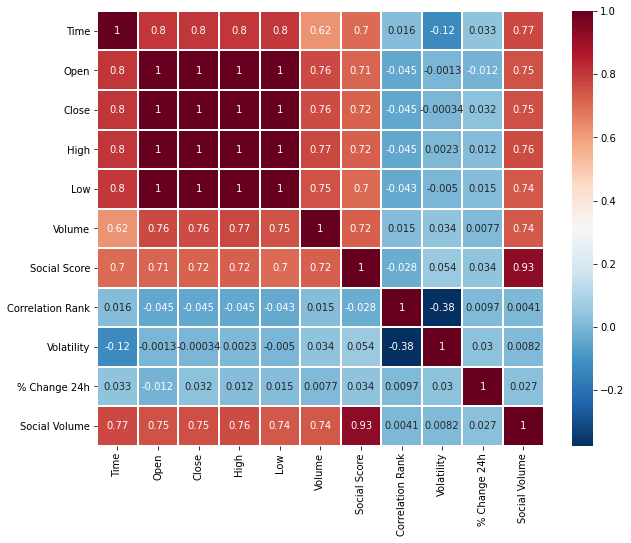

In [54]:
labels = ['Time', 'Open', 'Close', 'High', 'Low', 'Volume', 'Social Score', 'Correlation Rank', 'Volatility', '% Change 24h', 'Social Volume']

plt.figure(figsize=(10,8))
sns.heatmap(df_corr,
            cmap='RdBu_r',
            annot=True,
            linewidth=2, 
            xticklabels=labels, 
            yticklabels=labels)
plt.savefig('correlation_heatmap.png')
plt.show()
# Diverging colour palette to highlight both the highest value and lowest value.

In [56]:
datetime_btc = pd.to_datetime(df_btc['time'], unit='s', errors='raise') #update time and drop/merge now that heatmap is complete
pd.DataFrame(datetime_btc).head()                                       #per same method as used for ETH and XLM

time
0 2019-08-30
1 2019-08-31
2 2019-09-01
3 2019-09-02
4 2019-09-03

In [57]:
df_btc.drop(['time'], axis=1, inplace=True)

In [58]:
df_btc = pd.merge(left=df_btc, right=datetime_btc, left_index=True, right_index=True)

In [59]:
df_btc = df_btc.rename({'time': 'date'}, axis=1, inplace=False)

In [60]:
df_btc = df_btc.set_index('date')

In [61]:
df_btc['year'] = df_btc.index.year
df_btc['month'] = df_btc.index.month_name()
df_btc['weekday_name'] = df_btc.index.day_name()
df_btc.head()

open         close          high           low  \
date                                                                 
2019-08-30   9495.399060   9592.385842   9636.970473   9435.401440   
2019-08-31   9667.671418   9612.302402   9667.671418   9612.302402   
2019-09-01   9593.835884   9760.177254   9760.177254   9593.835884   
2019-09-02   9862.492351  10374.426465  10380.344756   9862.492351   
2019-09-03  10366.178781  10602.404439  10672.611272  10352.231916   

                  volume  social_score  correlation_rank  volatility  \
date                                                                   
2019-08-30  1.039902e+10     210852936               0.0    0.151796   
2019-08-31  8.266929e+09     198138317               0.0    0.090203   
2019-09-01  8.184971e+09     259500833               0.0    0.257690   
2019-09-02  1.255304e+10     321030863               0.0    0.740612   
2019-09-03  1.337401e+10     264399710               0.0    0.528566   

            percent_change_24h  social_volume  year      month weekday_name  
date                                                                         
2019-08-30            0.893360          30007  2019     August       Friday  
2019-08-31            0.207629          32715  2019     August     Saturday  
2019-09-01            1.538392          38628  2019  September       Sunday  
2019-09-02            6.293423          43166  2019  September       Monday  
2019-09-03            2.197500          38263  2019  September      Tuesday

### Time base indexing
#### 8th March 2021 - Tesla buys $1.5billion worth of bitcoin (43,000 bitcoin)

In [62]:
df_btc.loc['2021-02-08'] 
#Key Observations
#Bitcoin opens at $39329 and closes at $46095 with the percentage increase of 18% on this particluar day.
#Would likely be an outlier

open                   39329.695164
close                  46095.184032
high                   46095.184032
low                    39166.382209
volume                94719813864.0
social_score             4294967295
correlation_rank                2.7
volatility                 0.030254
percent_change_24h         18.06467
social_volume                603214
year                           2021
month                      February
weekday_name                 Monday
Name: 2021-02-08 00:00:00, dtype: object

#### 22nd April 2021 - Capital Gains Tax increase announcement by Joe Biden

In [63]:
df_btc.loc['2021-04-22']

#https://www.forbes.com/sites/sarahhansen/2021/04/22/biden-will-seek-to-nearly-double-capital-gains-tax-for-wealthy-according-to-report/

open                   54189.923783
close                  52017.971784
high                   54445.624629
low                    51598.893921
volume                89938806324.0
social_score             1454145049
correlation_rank                2.3
volatility                 0.016244
percent_change_24h        -4.053475
social_volume                322625
year                           2021
month                         April
weekday_name               Thursday
Name: 2021-04-22 00:00:00, dtype: object

#### 12 May 2021 -  Elon Musk tweeted that bitcoin would no longer be accepted by Tesla.

In [64]:
df_btc.loc['2021-05-12']

open                   55168.807222
close                  50088.735033
high                   55168.807222
low                    50088.735033
volume                90101826244.0
social_score             1817508863
correlation_rank                3.6
volatility                 0.015014
percent_change_24h        -11.72452
social_volume                375272
year                           2021
month                           May
weekday_name              Wednesday
Name: 2021-05-12 00:00:00, dtype: object

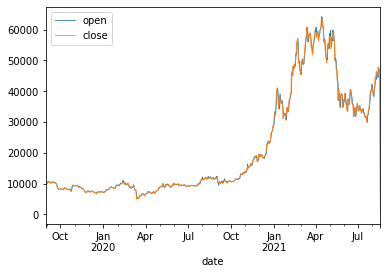

In [65]:
df_btc[['open','close']].plot(linewidth=0.8); #Relationship of opening and closing price
plt.savefig('open_close_graph.png')
plt.show()

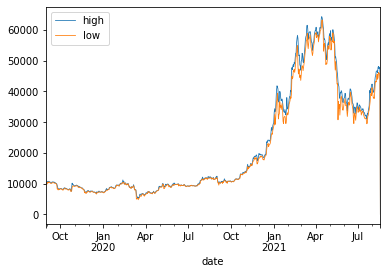

In [66]:
df_btc[['high','low']].plot(linewidth=0.8); #relationship of high and low
plt.savefig('high_low_graph.png')
plt.show()

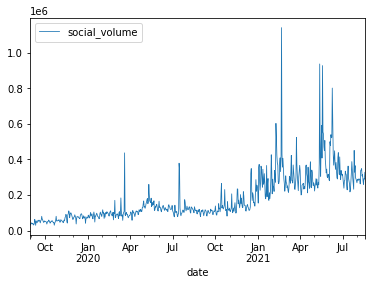

In [67]:
df_btc['social_volume'].plot(linewidth=0.8).legend(loc = 'upper left')
plt.savefig('social_volume_graph.png')
plt.show()

#### Percentage change

This line graph represents the percentage change over time. In this observation we can see an outlier in March 2020 where the percentage decreased dramatically by 37%.

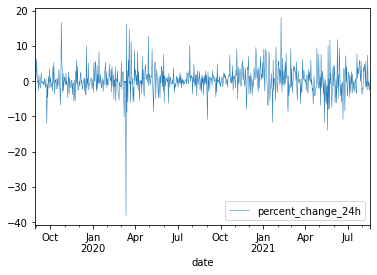

In [68]:
df_btc[['percent_change_24h']].plot(linewidth=0.5).legend(loc = 'lower right')
plt.savefig('percentage_change_graph.png')
plt.show()

#### Looking into the specific month of March for a closer overview.

In [69]:
MarApr2020_pct_drop = df_btc.loc['2020-03-01':'2020-04-01']
MarApr2020_pct_drop.head()

open        close         high          low        volume  \
date                                                                           
2020-03-01  8471.677619  8495.216182  8495.216182  8471.677619  3.015095e+10   
2020-03-02  8989.020188  8970.267332  8989.020188  8970.267332  5.641627e+10   
2020-03-03  8707.250184  8767.081185  8767.081185  8707.250184  6.517201e+10   
2020-03-04  8826.032723  8836.091699  8836.091699  8826.032723  3.677595e+10   
2020-03-05  8922.482272  9052.157869  9052.157869  8922.482272  3.467217e+10   

            social_score  correlation_rank  volatility  percent_change_24h  \
date                                                                         
2020-03-01     247980000               4.1    0.009087           -0.757173   
2020-03-02     381719055               3.5    0.015641            5.591984   
2020-03-03     375194455               3.1    0.009270           -2.265107   
2020-03-04     329252298               2.0    0.006534            0.787155   
2020-03-05     316607400               3.4    0.013706            2.445269   

            social_volume  year  month weekday_name  
date                                                 
2020-03-01          77904  2020  March       Sunday  
2020-03-02          87908  2020  March       Monday  
2020-03-03          92032  2020  March      Tuesday  
2020-03-04          92208  2020  March    Wednesday  
2020-03-05          93504  2020  March     Thursday

Here we can see the percentage decrease, between the 8th March 2020 and 12th March 2020 there was over a 30% decrease in the value of bitcoin, specifically on the 12th March 2020 the percentage drop was the lowest at 37%. Comparing this graph and the one below for social score you can see on the hightened social media activity with the highest social score reaching just under 800000000 on the 12th March, indicating the relationship exists between the social score and the fluaction in the value of BTC.
* Note that other traditional markets also plummeted during this time because of the pandemic which is another contributing factor to the percentage decrease.

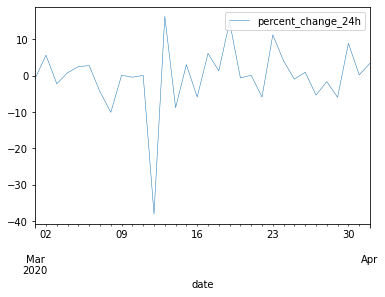

In [70]:
MarApr2020_pct_drop['percent_change_24h'].plot(linewidth=0.5).legend(loc='upper right')
plt.savefig('MarApri_pct_drop_graph.png')
plt.show()

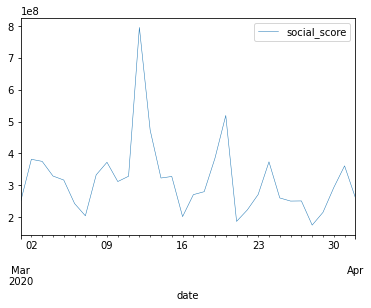

In [71]:
MarApr2020_pct_drop['social_score'].plot(linewidth=0.5).legend(loc='upper right')
plt.savefig('MarApri_pct_drop_graph_social_score.png')
plt.show()

### Correlation Scatterplot

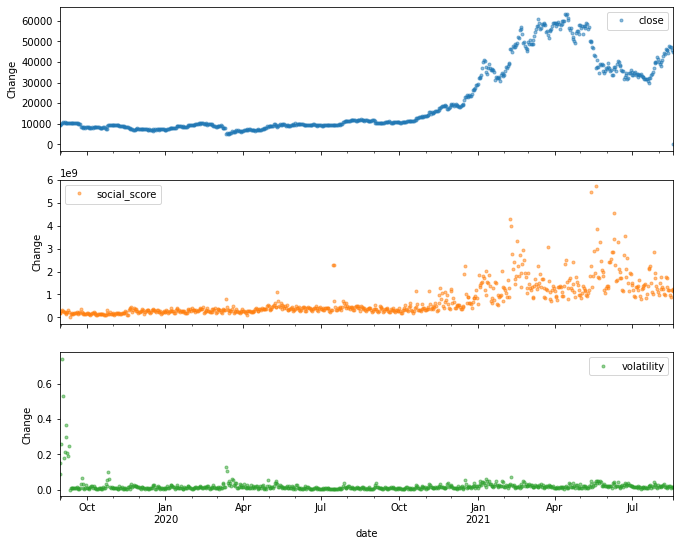

In [72]:
cols_plot = ['close', 'social_score','volatility']
axes = df_btc[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Change')
plt.savefig('cor_plts_close_SocialScore_Volatility_graph.png')
plt.show()

### Predicting Volatility
This is what we should study and work on if we were to take our project futher.
*Resource: https://python.plainenglish.io/how-to-predict-stock-volatility-with-python-46ae341ce804*

#### Calculating the daily returns by calculating the close figure and using the percentage change function.

In [73]:
df_btc['return'] = 100 * (df_btc['close'].pct_change()) #adding a return column to the DataFrame
df_btc.head()

open         close          high           low  \
date                                                                 
2019-08-30   9495.399060   9592.385842   9636.970473   9435.401440   
2019-08-31   9667.671418   9612.302402   9667.671418   9612.302402   
2019-09-01   9593.835884   9760.177254   9760.177254   9593.835884   
2019-09-02   9862.492351  10374.426465  10380.344756   9862.492351   
2019-09-03  10366.178781  10602.404439  10672.611272  10352.231916   

                  volume  social_score  correlation_rank  volatility  \
date                                                                   
2019-08-30  1.039902e+10     210852936               0.0    0.151796   
2019-08-31  8.266929e+09     198138317               0.0    0.090203   
2019-09-01  8.184971e+09     259500833               0.0    0.257690   
2019-09-02  1.255304e+10     321030863               0.0    0.740612   
2019-09-03  1.337401e+10     264399710               0.0    0.528566   

            percent_change_24h  social_volume  year      month weekday_name  \
date                                                                          
2019-08-30            0.893360          30007  2019     August       Friday   
2019-08-31            0.207629          32715  2019     August     Saturday   
2019-09-01            1.538392          38628  2019  September       Sunday   
2019-09-02            6.293423          43166  2019  September       Monday   
2019-09-03            2.197500          38263  2019  September      Tuesday   

              return  
date                  
2019-08-30       NaN  
2019-08-31  0.207629  
2019-09-01  1.538392  
2019-09-02  6.293423  
2019-09-03  2.197500

In [74]:
df_btc.isnull().sum() #Unsure why there is a null value in the return column for the 30th August 2019, in this instance dropping it would be ideal so not to mess up the prediction.

open                  0
close                 0
high                  0
low                   0
volume                0
social_score          0
correlation_rank      0
volatility            0
percent_change_24h    0
social_volume         0
year                  0
month                 0
weekday_name          0
return                1
dtype: int64

In [75]:
df_btc.dropna(inplace=True)
df_btc.head()

open         close          high           low  \
date                                                                 
2019-08-31   9667.671418   9612.302402   9667.671418   9612.302402   
2019-09-01   9593.835884   9760.177254   9760.177254   9593.835884   
2019-09-02   9862.492351  10374.426465  10380.344756   9862.492351   
2019-09-03  10366.178781  10602.404439  10672.611272  10352.231916   
2019-09-04  10558.217239  10567.312687  10707.844819  10178.037594   

                  volume  social_score  correlation_rank  volatility  \
date                                                                   
2019-08-31  8.266929e+09     198138317               0.0    0.090203   
2019-09-01  8.184971e+09     259500833               0.0    0.257690   
2019-09-02  1.255304e+10     321030863               0.0    0.740612   
2019-09-03  1.337401e+10     264399710               0.0    0.528566   
2019-09-04  1.147405e+10     237067039               0.0    0.178502   

            percent_change_24h  social_volume  year      month weekday_name  \
date                                                                          
2019-08-31            0.207629          32715  2019     August     Saturday   
2019-09-01            1.538392          38628  2019  September       Sunday   
2019-09-02            6.293423          43166  2019  September       Monday   
2019-09-03            2.197500          38263  2019  September      Tuesday   
2019-09-04           -0.330979          38027  2019  September    Wednesday   

              return  
date                  
2019-08-31  0.207629  
2019-09-01  1.538392  
2019-09-02  6.293423  
2019-09-03  2.197500  
2019-09-04 -0.330979

#### Plot Daily Returns

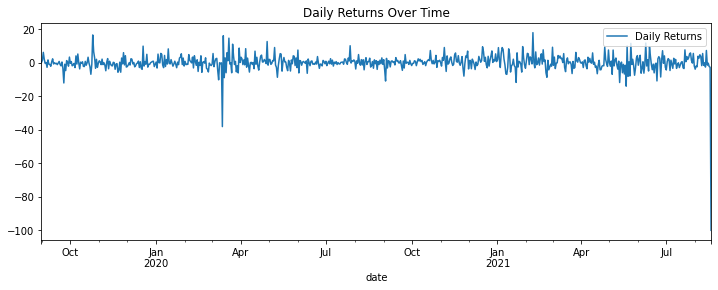

In [76]:
fig = plt.figure()
fig.set_figwidth(12)
df_btc['return'].plot(label = 'Daily Returns', title = 'Daily Returns Over Time').legend(loc='upper right')
plt.savefig('Daily_Returns_graph.png')
plt.show()

In [77]:
daily_volatility = df_btc['return'].std()
print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

monthly_volatility = math.sqrt(21) * daily_volatility
print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

annual_volatility = math.sqrt(252) * daily_volatility
print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

Daily volatility:  5.45%
Monthly volatility:  24.96%
Annual volatility:  86.45%


### Ethereum Data Visualization

#### Ethereum reaches all time high percentage increase

Opening price of 2960.27, Closing price of 3412.74 and ETH reached High of 3427.88 - Percentage change increase of 15.6%.

Not necessarily influenced by social media - ETH recently has been undergoing software updates and user developments in preparation for ETH 2.0 and the upcoming London Hard Fork which has helped boost it. Social media definitely a factor in pushing forward due to Correlation rank being above average mark of 2.5 at 3.4.

In [78]:
df_eth.loc['2021-05-03']

open                    2960.268328
close                    3412.73921
high                    3427.876575
low                     2959.949931
volume                69408168588.0
correlation_rank                3.4
social_score              548583121
volatility                   0.0285
social_volume                107425
social_dominance           8.918898
percent_change_24h        15.599738
market_dominance          14.186035
year                           2021
month                           May
day                          Monday
Name: 2021-05-03 00:00:00, dtype: object

####  Looking at data for the rest of the month of May as significant currency rises took place in this month

In [79]:
df_eth.loc['2021-05']

open        close         high          low        volume  \
date                                                                           
2021-05-01  2771.878687  2939.058793  2946.253082  2749.942544  4.029586e+10   
2021-05-02  2922.371192  2952.203243  2982.888228  2864.805673  4.042242e+10   
2021-05-03  2960.268328  3412.739210  3427.876575  2959.949931  6.940817e+10   
2021-05-04  3366.145712  3249.342375  3500.408880  3153.041879  8.449589e+10   
2021-05-05  3295.279782  3499.792889  3545.611789  3221.696217  7.033236e+10   
2021-05-06  3491.522538  3494.651647  3588.363374  3369.478387  6.274546e+10   
2021-05-07  3511.375841  3488.654222  3581.471755  3385.720817  5.471095e+10   
2021-05-08  3524.698450  3902.454651  4100.833480  3479.226322  7.353255e+10   
2021-05-09  3882.761592  3928.434986  3996.182051  3749.007761  6.977766e+10   
2021-05-10  3897.232242  3973.765704  4187.665763  3688.017753  8.881806e+10   
2021-05-11  3984.522195  4164.644157  4183.490152  3803.606507  7.374004e+10   
2021-05-12  4027.925111  3858.646934  4262.737723  3724.307914  9.167646e+10   
2021-05-13  3858.233164  3730.411619  4053.450710  3560.849486  1.031540e+11   
2021-05-14  3726.482196  4082.316760  4156.389006  3691.819869  6.780822e+10   
2021-05-15  4089.232689  3681.558852  4111.416246  3668.506817  6.109353e+10   
2021-05-16  3675.424317  3597.171388  3866.078810  3398.728059  7.166211e+10   
2021-05-17  3595.065242  3286.394132  3595.065242  3138.454737  8.319517e+10   
2021-05-18  3289.093334  3377.326855  3552.410545  3236.256951  6.263682e+10   
2021-05-19  3383.170383  2477.193626  3383.170383  1953.472426  1.166261e+11   
2021-05-20  2483.044701  2789.718968  2961.308584  2234.838807  9.512855e+10   
2021-05-21  2792.306361  2443.825664  2895.192646  2185.691823  7.577504e+10   
2021-05-22  2441.897183  2313.341197  2489.592695  2180.729974  1.160034e+11   
2021-05-23  2306.953285  2093.396595  2335.338508  1798.056452  7.898846e+10   
2021-05-24  2087.402301  2637.148686  2646.672675  2087.402301  8.002882e+10   
2021-05-25  2641.345395  2698.050218  2741.588560  2415.765874  9.577765e+10   
2021-05-26  2702.763030  2883.638836  2899.101649  2670.325797  7.510059e+10   
2021-05-27  2887.373143  2749.341690  2887.373143  2650.728531  4.837456e+10   
2021-05-28  2747.645901  2422.692828  2747.645901  2361.802705  5.442681e+10   
2021-05-29  2420.567056  2285.611423  2540.100010  2233.469061  4.907258e+10   
2021-05-30  2284.430704  2389.955180  2466.121092  2206.840025  3.988460e+10   
2021-05-31  2391.742202  2702.367325  2706.266229  2305.499390  4.890273e+10   

            correlation_rank  social_score  volatility  social_volume  \
date                                                                    
2021-05-01               3.2     203265908    0.014695          59479   
2021-05-02               4.0     148679920    0.019261          46904   
2021-05-03               3.4     548583121    0.028500         107425   
2021-05-04               4.6     729460073    0.043424          85191   
2021-05-05               3.2     436062047    0.022328          83675   
2021-05-06               3.8     166280824    0.021916          75243   
2021-05-07               3.7     201993413    0.012551          76260   
2021-05-08               3.5     307025580    0.018862          69064   
2021-05-09               4.7     236920848    0.043158          68940   
2021-05-10               2.9     498811725    0.026537          95058   
2021-05-11               3.4     327793858    0.024766          83534   
2021-05-12               3.6     365704531    0.033304          95804   
2021-05-13               2.9     343581303    0.043914          92428   
2021-05-14               3.2     316556116    0.041494          67331   
2021-05-15               3.8     195838497    0.033026          60447   
2021-05-16               2.7     159832468    0.032306          55761   
2021-05-17               2.7     295431619    0.049709          

#### ETH sinks by 27% amongst other Cryptocurrencies that day

https://www.forbes.com/sites/billybambrough/2021/05/19/crypto-price-crash-bitcoin-drops-under-40000-as-ethereum-binances-bnb-cardano-and-dogecoin-collapse/?sh=4577fa6635c5

External influence of Elon Musk tweeting about BitCoin alongside the BitCoin and Cryptocurrency sell-off being exacerbated by China instructing banks not to facilitate Cryptocurrency transactions and warning investors to avoid trading speculatively.

In [80]:
df_eth.loc['2021-05-19']

open                     3383.170383
close                    2477.193626
high                     3383.170383
low                      1953.472426
volume                116626051501.0
correlation_rank                 2.7
social_score               527995059
volatility                  0.072022
social_volume                 110170
social_dominance            5.309052
percent_change_24h        -26.652239
market_dominance            23.19939
year                            2021
month                            May
day                        Wednesday
Name: 2021-05-19 00:00:00, dtype: object

#### Price rise in Ethereum after Elon Musk confirms he owns it at a conference

https://www.cnbc.com/2021/07/21/elon-musk-jack-dorsey-speak-about-cryptocurrency-at-b-word-conference.html

Opening price was at 1791.14 and closing price was 1993.41. Ethereum price was at its high point of 2016.07 - percentage change increase of 11% took place on the day after Elon Musk's statement.

Correlation rank was above the average of 2.5 at 3.3.

Correlation rank provides insight into an algorithm determining the correlation of our social data to the coin price/volume.

In [81]:
df_eth.loc['2021-07-21']

open                     1791.141118
close                    1993.412204
high                      2016.06815
low                      1777.916445
volume                31043148934.48
correlation_rank                 3.3
social_score               205726904
volatility                   0.02949
social_volume                  90991
social_dominance            7.360689
percent_change_24h         11.366686
market_dominance           14.432093
year                            2021
month                           July
day                        Wednesday
Name: 2021-07-21 00:00:00, dtype: object

#### ETH Market Dominance significantly higher over the rest of May

Market Dominance is calculated by taking the coins market capitalization and dividing it by the total market capitalization of the cryptocurrency market.

-- This is useful and an interesting point to consider when looking at an altcoin like Ethereum (ETH) as it is one of the largest cryptocurrencies by market capitalization.

Social Dominance, similar to Market Dominance, is a calculation of the 'share of voice' across all social media data. It divides the coins social volume by the entire cryptocurrency market's social volume.

#### Steady increase in both Social Dominance and Market Dominance for the rest of the month highlights potential impact of Elon Musk's statement

In [82]:
df_eth.loc['2021-07-21' : '2021-07-31']

open        close         high          low        volume  \
date                                                                           
2021-07-21  1791.141118  1993.412204  2016.068150  1777.916445  3.104315e+10   
2021-07-22  1994.230794  2028.844601  2044.081228  1958.240437  2.558740e+10   
2021-07-23  2026.484993  2119.981160  2125.731174  1998.140991  2.950046e+10   
2021-07-24  2118.825970  2183.658358  2195.561847  2102.846281  2.244451e+10   
2021-07-25  2183.106021  2184.353301  2200.530051  2118.047309  1.952124e+10   
2021-07-26  2191.270383  2229.252744  2415.327916  2182.758825  4.044656e+10   
2021-07-27  2230.971451  2300.594523  2321.193811  2179.759097  3.372441e+10   
2021-07-28  2300.994147  2300.626231  2340.761537  2252.215367  2.707100e+10   
2021-07-29  2302.753111  2378.633379  2391.664307  2271.459252  2.099501e+10   
2021-07-30  2383.802004  2462.663339  2478.126409  2338.380393  2.841389e+10   
2021-07-31  2459.567003  2529.290875  2544.563162  2422.723659  2.455198e+10   

            correlation_rank  social_score  volatility  social_volume  \
date                                                                    
2021-07-21               3.3     205726904    0.029490          90991   
2021-07-22               4.4     197244989    0.037295          80695   
2021-07-23               3.7     179683028    0.017915          88850   
2021-07-24               3.7      94949955    0.021072          84239   
2021-07-25               3.8     120648622    0.016154          54228   
2021-07-26               3.4     191243536    0.031939          75591   
2021-07-27               2.7     165872274    0.032238          87309   
2021-07-28               4.0     166746170    0.020857          69689   
2021-07-29               3.2     189429646    0.008563          81699   
2021-07-30               4.7     258622137    0.018485          82759   
2021-07-31               3.2     147351059    0.020852          91587   

            social_dominance  percent_change_24h  market_dominance  year  \
date                                                                       
2021-07-21          7.360689           11.366686         14.432093  2021   
2021-07-22          7.274289            1.777475         16.107140  2021   
2021-07-23          8.513741            4.492042         16.368597  2021   
2021-07-24          8.025131            3.003668         16.134430  2021   
2021-07-25          4.900885            0.031825         16.243287  2021   
2021-07-26          5.306616            2.055503         16.552962  2021   
2021-07-27          8.436386            3.200255         15.716365  2021   
2021-07-28          5.465392            0.001378         15.970905  2021   
2021-07-29          7.348632            3.390692         15.810682  2021   
2021-07-30          7.701126            3.532699         15.971055  2021   
2021-07-31          8.276066            2.705507         16.361928  2021   

           month        day  
date                         
2021-07-21  July  Wednesday  
2021-07-22  July   Thursday  
2021-07-23  July     Friday  
2021-07-24  July   Saturday  
2021-07-25  July     Sunday  
2021-07-26  July     Monday  
2021-07-27  July    Tuesday  
2021-07-28  July  Wednesday  
2021-07-29  July   Thursday  
2021-07-30  July     Friday  
2021-07-31  July   Saturday

### ETH developments in month of August

#### Ethereum's London Hard Fork updates went live from 4th August 2021

We can see a healthy increase in Social Volume and Social Dominance from the 4th to the 5th of August - gesturing to potential impact of updates going live.

Not many developments made in the Opening, Closing and High prices because of updates.

In [83]:
df_eth.loc['2021-08-04' : '2021-08-18' ]

open        close         high          low        volume  \
date                                                                           
2021-08-04  2510.011678  2727.452295  2765.342425  2477.150686  4.364330e+10   
2021-08-05  2724.491978  2827.935782  2849.398035  2554.125550  5.849648e+10   
2021-08-06  2825.402304  2893.060150  2946.151296  2737.123675  4.483133e+10   
2021-08-07  2888.351883  3157.090777  3164.292944  2876.523810  5.865568e+10   
2021-08-08  3156.583973  3012.834501  3181.093797  2955.461772  4.969974e+10   
2021-08-09  3012.440682  3161.456065  3180.420325  2912.252469  5.588551e+10   
2021-08-10  3160.781714  3142.292722  3228.962791  3059.220847  4.487003e+10   
2021-08-11  3144.343968  3166.694453  3272.537318  3130.198880  4.040247e+10   
2021-08-12  3165.890298  3049.793163  3229.124434  2992.702596  4.017633e+10   
2021-08-13  3049.850568  3318.962186  3322.559546  3049.850568  3.793116e+10   
2021-08-14  3322.425753  3266.704886  3327.888247  3213.143186  3.137191e+10   
2021-08-15  3266.657674  3310.665542  3318.232845  3124.587398  3.581827e+10   
2021-08-16  3310.886888  3152.480561  3331.846882  3145.973744  3.800192e+10   
2021-08-17  3152.352903  3020.723096  3281.062170  3009.094783  4.400598e+10   
2021-08-18  3019.253467  3087.929892  3115.059980  2967.633996  2.664740e+10   

            correlation_rank  social_score  volatility  social_volume  \
date                                                                    
2021-08-04               3.1     306258134    0.023310          91866   
2021-08-05               3.8     508337029    0.036850         136750   
2021-08-06               3.4     311013091    0.026237          96348   
2021-08-07               3.1     187611530    0.032691          79243   
2021-08-08               3.7     147683202    0.028028          69964   
2021-08-09               3.2     242785849    0.024302          84163   
2021-08-10               3.5     331063491    0.025299         100140   
2021-08-11               3.2     267087364    0.012420         112246   
2021-08-12               3.4     250204148    0.017495         104175   
2021-08-13               2.7     245934662    0.024540          95530   
2021-08-14               3.1     156003137    0.023601          80301   
2021-08-15               2.6     119895878    0.012569          71860   
2021-08-16               3.3     234372795    0.016627         109869   
2021-08-17               2.4     255293007    0.016759          77645   
2021-08-18               2.6     294305955    0.021831          83109   

            social_dominance  percent_change_24h  market_dominance  year  \
date                                                                       
2021-08-04          8.049404            8.623382         16.649304  2021   
2021-08-05         11.013650            3.684152         17.461182  2021   
2021-08-06          8.121394            2.302894         17.501773  2021   
2021-08-07          7.078124            9.126344         17.352451  2021   
2021-08-08          6.207865           -4.569279         19.462019  2021   
2021-08-09          6.862634            4.932948         17.260630  2021   
2021-08-10          8.787595           -0.606156         18.330316  2021   
2021-08-11          8.820647            0.776558         18.205972  2021   
2021-08-12          8.743320           -3.691587         18.701193  2021   
2021-08-13          8.241249            8.825812         16.720391  2021   
2021-08-14          6.423987           -1.574507         18.043957  2021   
2021-08-15          6.425055            1.345719         15.918664  2021   
2021-08-16          7.157445           -4.778042         18.328125  2021   
2021-08-17          5.039432           -4.179485         17.847769  2021   
2021-08-18          5.796427           -2.550000         17.273360  2021   

             month        day  
date                           
2021-08-04  August  Wednesday  
2021-08-05  August   Thursd

### Histogram Plot

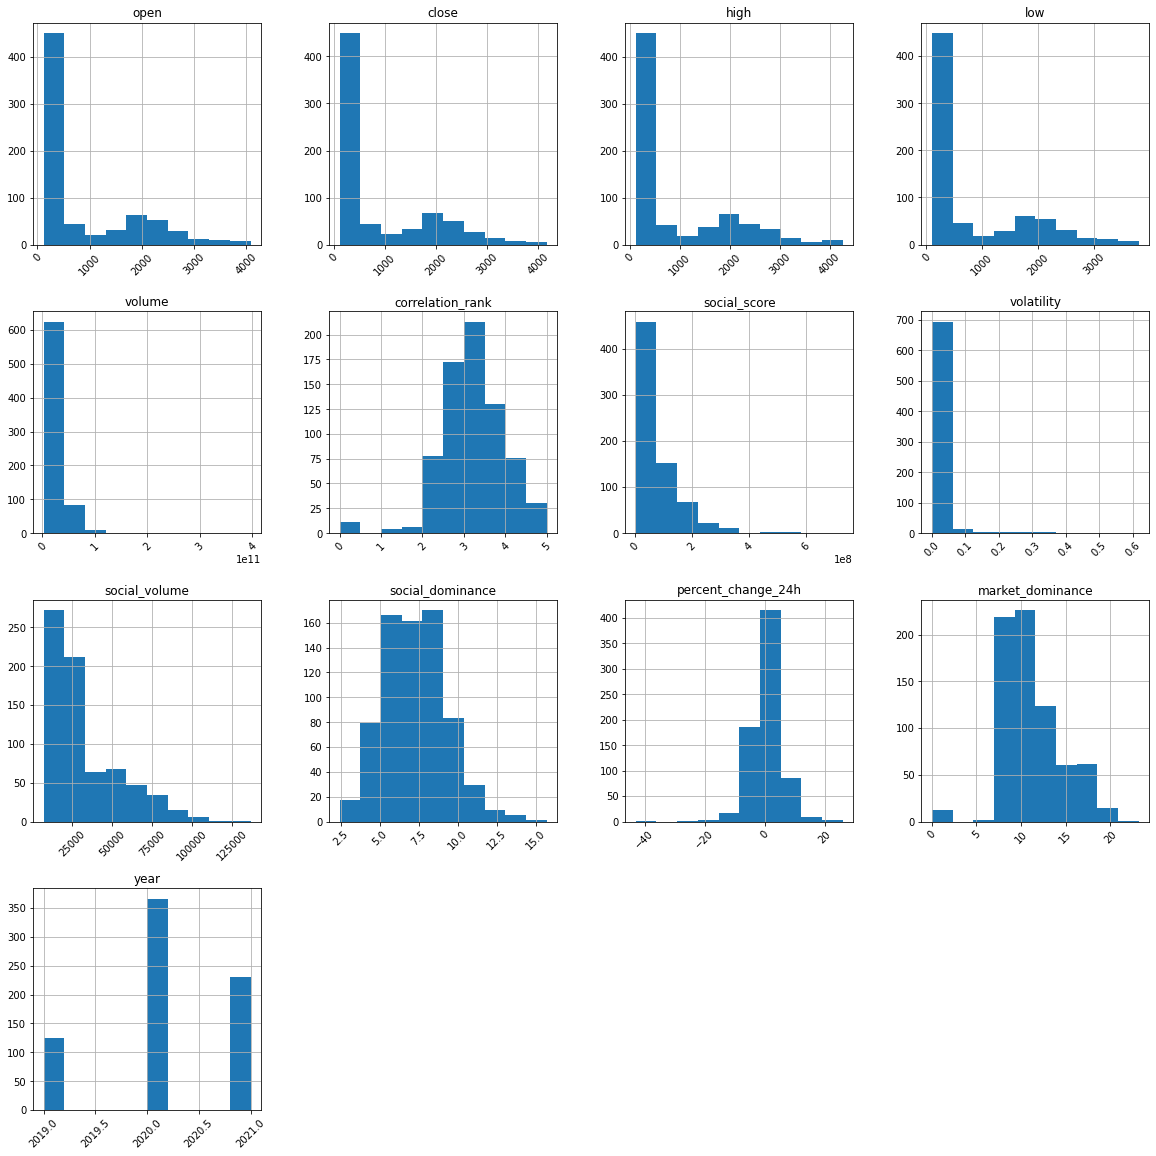

In [84]:
df_eth.hist(figsize=(20,20), xrot=45)
plt.show()

### Heat Map using Seaborn:

In [85]:
eth_corr = df_eth.corr()
eth_corr

open     close      high       low    volume  \
open                1.000000  0.996775  0.998779  0.997149  0.653932   
close               0.996775  1.000000  0.998650  0.998600  0.651493   
high                0.998779  0.998650  1.000000  0.997247  0.657498   
low                 0.997149  0.998600  0.997247  1.000000  0.642127   
volume              0.653932  0.651493  0.657498  0.642127  1.000000   
correlation_rank    0.085429  0.087186  0.085304  0.089665  0.089822   
social_score        0.811045  0.811390  0.818267  0.801787  0.574668   
volatility          0.011575  0.011172  0.015215  0.004717  0.048907   
social_volume       0.923788  0.923814  0.925474  0.920386  0.623280   
social_dominance   -0.362511 -0.358340 -0.361007 -0.359198 -0.208324   
percent_change_24h -0.010360  0.042264  0.016724  0.024895  0.007336   
market_dominance    0.819986  0.809565  0.816664  0.810854  0.535395   
year                0.802922  0.803640  0.802455  0.803586  0.600112   

                    correlation_rank  social_score  volatility  social_volume  \
open                        0.085429      0.811045    0.011575       0.923788   
close                       0.087186      0.811390    0.011172       0.923814   
high                        0.085304      0.818267    0.015215       0.925474   
low                         0.089665      0.801787    0.004717       0.920386   
volume                      0.089822      0.574668    0.048907       0.623280   
correlation_rank            1.000000      0.088900   -0.405371       0.094514   
social_score                0.088900      1.000000    0.052498       0.857908   
volatility                 -0.405371      0.052498    1.000000      -0.012052   
social_volume               0.094514      0.857908   -0.012052       1.000000   
social_dominance           -0.078259     -0.214988    0.108138      -0.200085   
percent_change_24h          0.058339      0.027521    0.003603       0.034946   
market_dominance            0.246104      0.683362   -0.254284       0.819237   
year                        0.147953      0.630259   -0.086585       0.774697   

                    social_dominance  percent_change_24h  market_dominance  \
open                       -0.362511           -0.010360          0.819986   
close                      -0.358340            0.042264          0.809565   
high                       -0.361007            0.016724          0.816664   
low                        -0.359198            0.024895          0.810854   
volume                     -0.208324            0.007336          0.535395   
correlation_rank           -0.078259            0.058339          0.246104   
social_score               -0.214988            0.027521          0.683362   
volatility                  0.108138            0.003603         -0.254284   
social_volume              -0.200085            0.034946          0.819237   
social_dominance            1.000000            0.053972         -0.233504   
percent_change_24h          0.053972            1.000000         -0.094034   
market_dominance           -0.233504           -0.094034          1.000000   
year                       -0.354441            0.055806          0.780394   

                        year  
open                0.802922  
close               0.803640  
high                0.802455  
low                 0.803586  
volume              0.600112  
correlation_rank    0.147953  
social_score        0.630259  
volatility         -0.086585  
social_volume       0.774697  
social_dominance   -0.354441  
percent_change_24h  0.055806  
market_dominance    0.780394  
year                1.000000

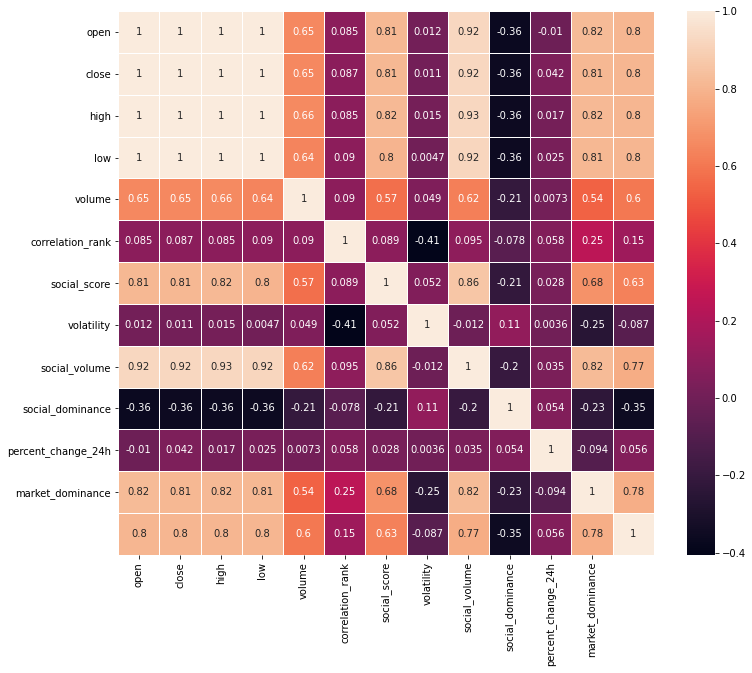

In [86]:
labels = ['open', 'close', 'high', 'low', 'volume', 'correlation_rank', 'social_score', 'volatility', 'social_volume', 'social_dominance','percent_change_24h', 'market_dominance']

plt.figure(figsize=(12,10))
sns.heatmap(eth_corr,annot=True, linewidth=0.5, xticklabels=labels, yticklabels=labels)
plt.show()

### Scatterplot:
#### Looking at the correlation between Social Volume, Closing prices, Percentage Change in 24h and Volatility of Ethereum:

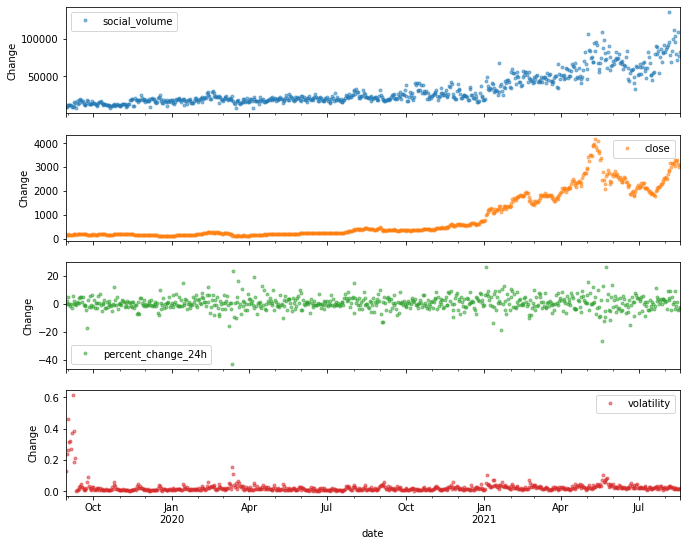

In [87]:
cols_plot = ['social_volume', 'close','percent_change_24h','volatility']
axes = df_eth[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Change')

### Multi-line Plots:
#### Relationship between the Open and Close prices:

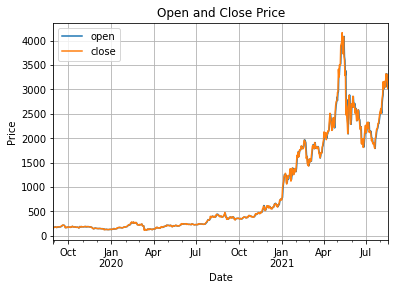

In [88]:
df_eth[['open', 'close']].plot(linewidth=1.5);
plt.title('Open and Close Price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.grid()
plt.show()

#### Relationship between the High and Low prices: 

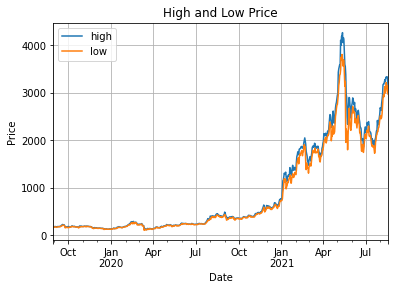

In [89]:
df_eth[['high', 'low']].plot(linewidth=1.5);
plt.title('High and Low Price')
plt.xlabel('Date')
plt.ylabel('Price')

plt.grid()
plt.show()

#### Relationship between Social Score and Social Volume:

Social score provides a deep insight into the social activity of a coin by looking at likes, shares, comments, followers and more across different social channels. This is important in looking at the amount of engagement a community has across the posted content.

Social volume is an important factor in determining if a coin holds credibility. It will layer in social activity from different social channels like Reddit, Twitter, news sources and the like, to provide an insight into the community size of an altcoin. 

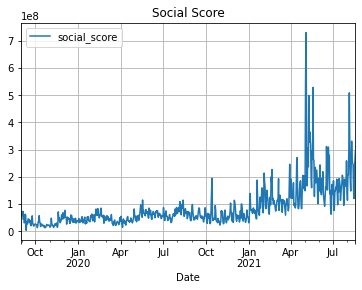

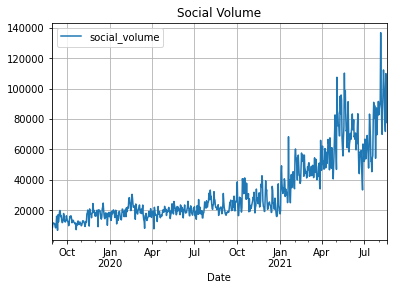

In [90]:
df_eth[['social_score']].plot(linewidth=1.5);
plt.title('Social Score')
plt.xlabel('Date')

plt.grid()
plt.show()

df_eth[['social_volume']].plot(linewidth=1.5);
plt.title('Social Volume')
plt.xlabel('Date')

plt.grid()
plt.show()

#### Relationship between the High, Close and Social Volume columns:

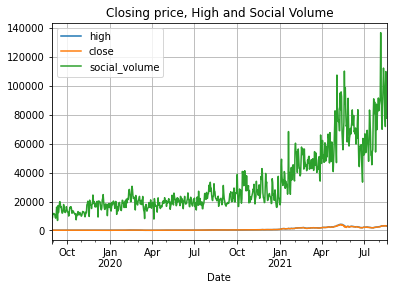

In [91]:
df_eth[['high', 'close', 'social_volume']].plot(linewidth=1.5);
plt.title('Closing price, High and Social Volume')
plt.xlabel('Date')

plt.grid()
plt.show()

#### Relationship between Social Dominance and Market Dominance:

Market Dominance is calculated by taking the coins market capitalization and dividing it by the total market capitalization of the cryptocurrency market.

-- This is useful and an interesting point to consider when looking at an altcoin like Ethereum (ETH) as it is one of the largest cryptocurrencies by market capitalization.

Social Dominance, similar to Market Dominance, is a calculation of the 'share of voice' across all social media data. It divides the coins social volume by the entire cryptocurrency market's social volume.

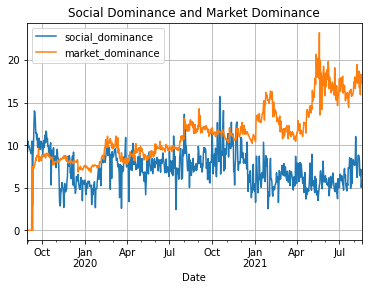

In [92]:
df_eth[['social_dominance', 'market_dominance']].plot(linewidth=1.5);
plt.title('Social Dominance and Market Dominance')
plt.xlabel('Date')


plt.grid()
plt.show()

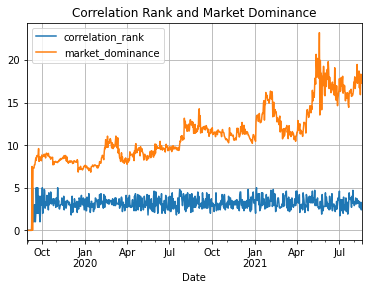

In [93]:
df_eth[['correlation_rank', 'market_dominance']].plot(linewidth=1.5);
plt.title('Correlation Rank and Market Dominance')
plt.xlabel('Date')
plt.grid()
plt.show()

### Stellar Data Visualization
#### Histogram Plot

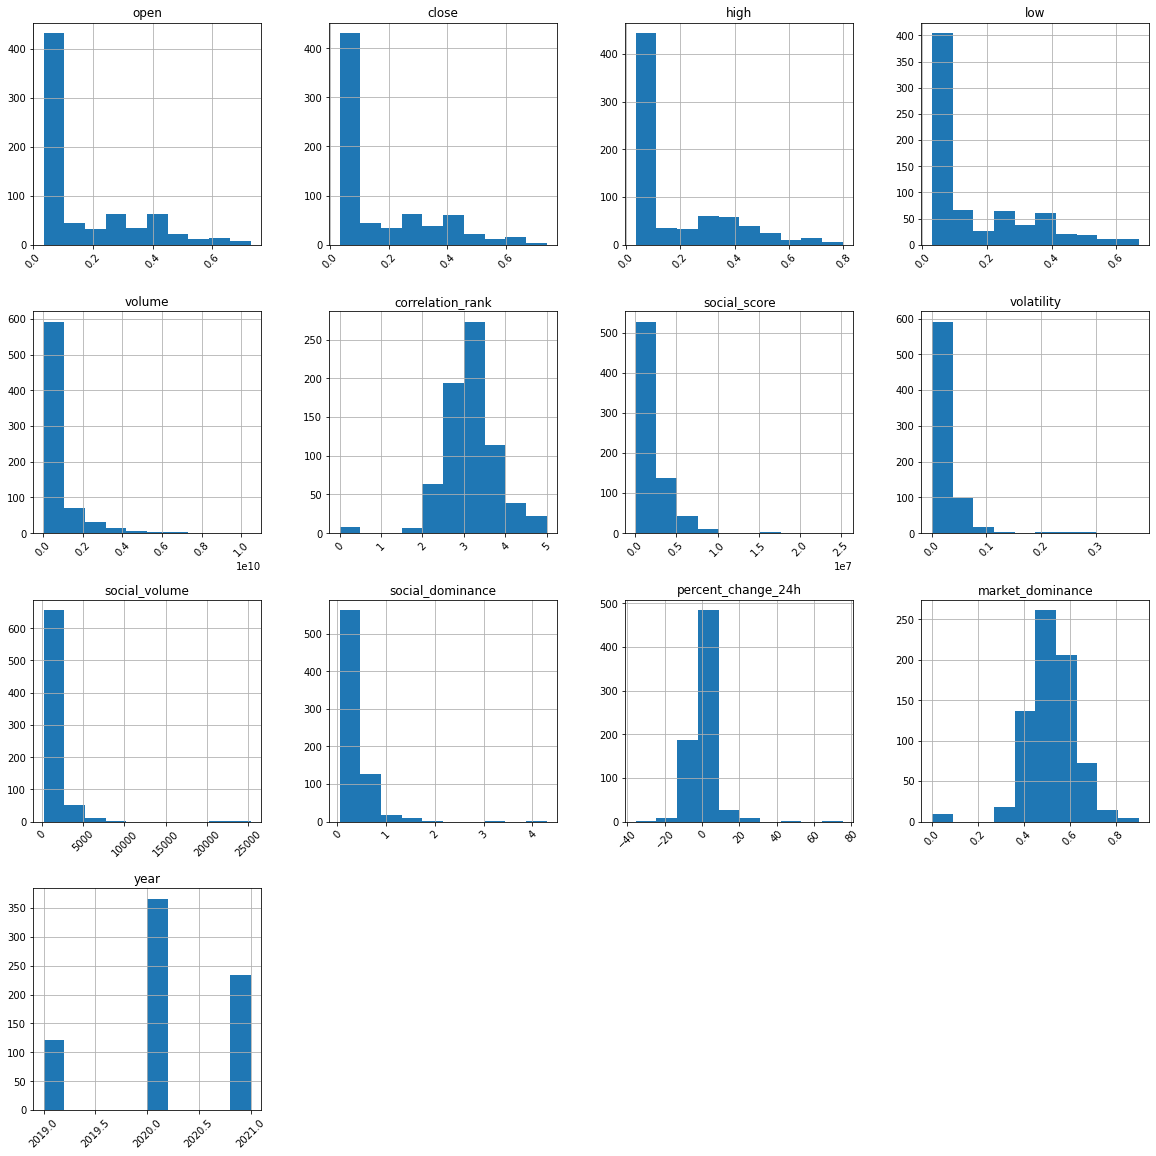

In [94]:
df_xlm.hist(figsize=(20,20), xrot=45)
plt.show()

#### Heatmap using Seaborn

In [96]:
XLM_corr = df_xlm.corr()
XLM_corr

open     close      high       low    volume  \
open                1.000000  0.993820  0.995827  0.994165  0.700827   
close               0.993820  1.000000  0.997291  0.996540  0.725188   
high                0.995827  0.997291  1.000000  0.993036  0.748739   
low                 0.994165  0.996540  0.993036  1.000000  0.689269   
volume              0.700827  0.725188  0.748739  0.689269  1.000000   
correlation_rank    0.051234  0.057053  0.067424  0.053891  0.222671   
social_score        0.422427  0.446013  0.464357  0.421370  0.682782   
volatility          0.135939  0.145419  0.161207  0.121827  0.339332   
social_volume       0.316344  0.338554  0.361415  0.312342  0.683109   
social_dominance   -0.189712 -0.171261 -0.153166 -0.193338  0.254566   
percent_change_24h -0.028261  0.055635  0.032514  0.017227  0.268120   
market_dominance    0.246737  0.233957  0.252096  0.224343  0.398949   
year                0.781762  0.783409  0.779882  0.784170  0.547886   

                    correlation_rank  social_score  volatility  social_volume  \
open                        0.051234      0.422427    0.135939       0.316344   
close                       0.057053      0.446013    0.145419       0.338554   
high                        0.067424      0.464357    0.161207       0.361415   
low                         0.053891      0.421370    0.121827       0.312342   
volume                      0.222671      0.682782    0.339332       0.683109   
correlation_rank            1.000000      0.191614   -0.241475       0.216583   
social_score                0.191614      1.000000    0.279655       0.756920   
volatility                 -0.241475      0.279655    1.000000       0.325868   
social_volume               0.216583      0.756920    0.325868       1.000000   
social_dominance            0.162427      0.464032    0.263002       0.742941   
percent_change_24h          0.119473      0.320083    0.155546       0.317777   
market_dominance            0.319371      0.248192   -0.230106       0.346529   
year                        0.075649      0.414574    0.028459       0.291616   

                    social_dominance  percent_change_24h  market_dominance  \
open                       -0.189712           -0.028261          0.246737   
close                      -0.171261            0.055635          0.233957   
high                       -0.153166            0.032514          0.252096   
low                        -0.193338            0.017227          0.224343   
volume                      0.254566            0.268120          0.398949   
correlation_rank            0.162427            0.119473          0.319371   
social_score                0.464032            0.320083          0.248192   
volatility                  0.263002            0.155546         -0.230106   
social_volume               0.742941            0.317777          0.346529   
social_dominance            1.000000            0.287053          0.337647   
percent_change_24h          0.287053            1.000000         -0.076309   
market_dominance            0.337647           -0.076309          1.000000   
year                       -0.221718            0.044656          0.060295   

                        year  
open                0.781762  
close               0.783409  
high                0.779882  
low                 0.784170  
volume              0.547886  
correlation_rank    0.075649  
social_score        0.414574  
volatility          0.028459  
social_volume       0.291616  
social_dominance   -0.221718  
percent_change_24h  0.044656  
market_dominance    0.060295  
year                1.000000

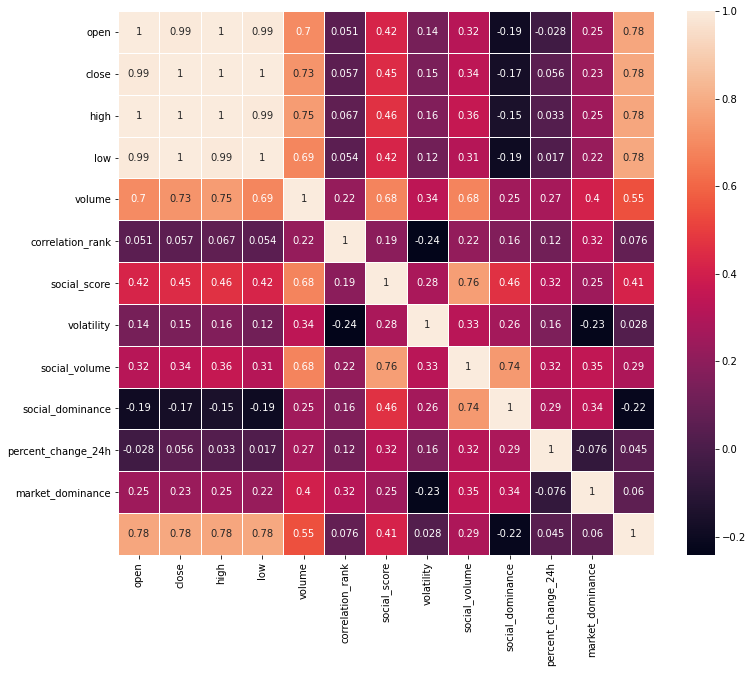

In [97]:
labels = ['open', 'close', 'high', 'low', 'volume', 'correlation_rank', 'social_score', 'volatility', 'social_volume', 'social_dominance','percent_change_24h', 'market_dominance']

plt.figure(figsize=(12,10))
sns.heatmap(XLM_corr,annot=True, linewidth=0.5, xticklabels=labels, yticklabels=labels)
plt.show()

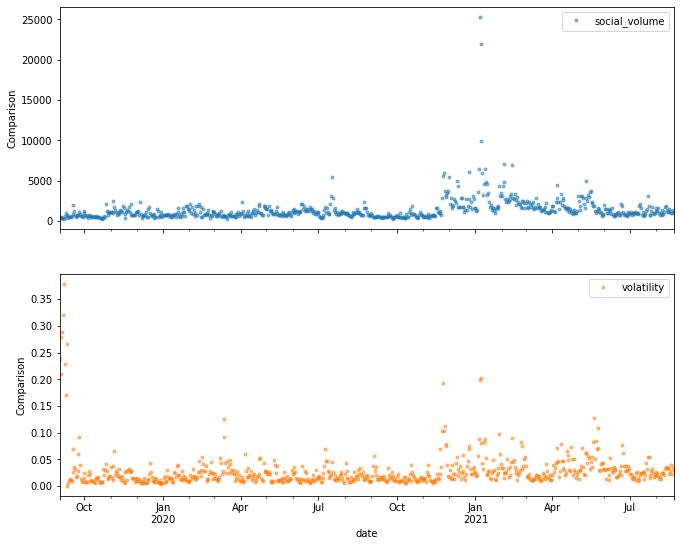

In [98]:
cols_plot = ['social_volume','volatility']
axes = df_xlm[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Comparison')

The two graphs look similar. Arguably this proves that the amount of times Stellar is spoken about on social media effects the volatility.

#### Social Score compared to Social Volume

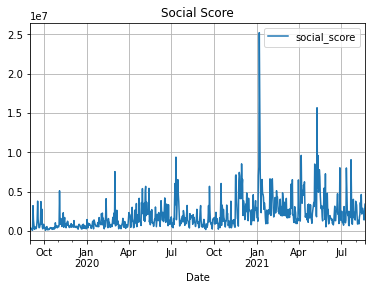

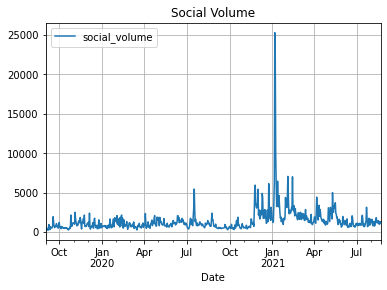

In [99]:
df_xlm[['social_score']].plot(linewidth=1.5);
plt.title('Social Score')
plt.xlabel('Date')

plt.grid()
plt.show()

df_xlm[['social_volume']].plot(linewidth=1.5);
plt.title('Social Volume')
plt.xlabel('Date')

plt.grid()
plt.show()

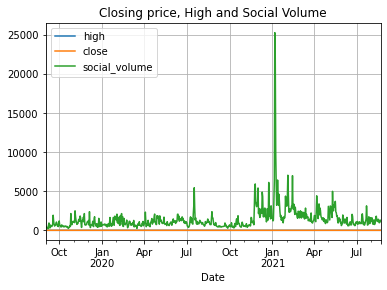

In [100]:
df_xlm[['high', 'close', 'social_volume']].plot(linewidth=1.5);
plt.title('Closing price, High and Social Volume')
plt.xlabel('Date')

plt.grid()
plt.show()

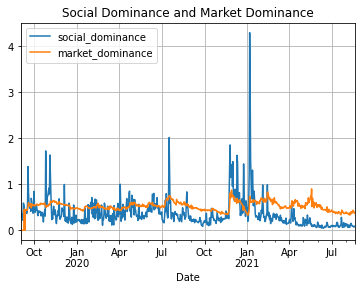

In [101]:
df_xlm[['social_dominance', 'market_dominance']].plot(linewidth=1.5);
plt.title('Social Dominance and Market Dominance')
plt.xlabel('Date')


plt.grid()
plt.show()

Around Jan 2021 there was a reddit post questioning the stablility of Stellar. Also questioning whether it was profitable. The overall consensus was no. This could be the reason why in Jan 2021 it has a high social dominance but the market dominance plummets.

### Dogecoin Data Visualization
<span style='color:Blue'> Visualize a comparison between the close price movement and the social score of Dogecoin. </span> Using matplotlib, graphs can show the trend of the price and social media engagement.

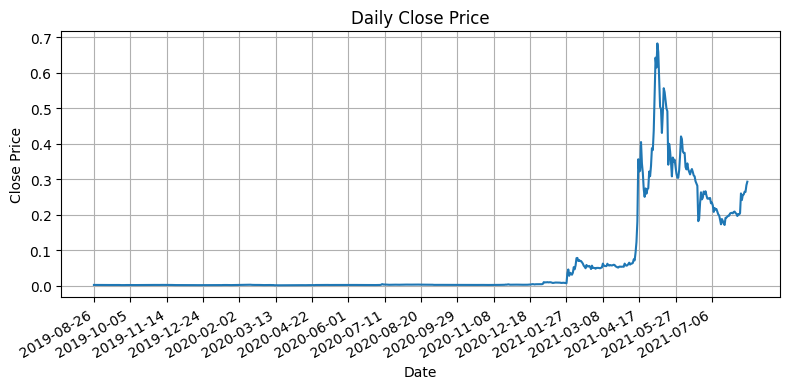

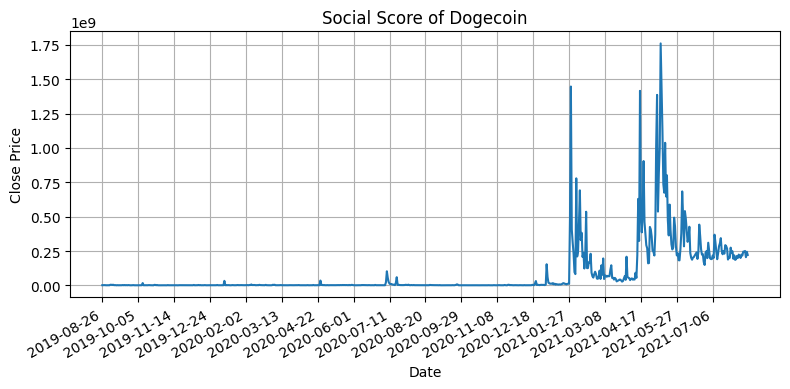

In [104]:
fig = plt.figure(figsize=(8,4), dpi=100) # line graph of daily close price

plt.plot(clean_doge['time'],clean_doge['close'])

plt.title('Daily Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(clean_doge['time'].values[::40])

fig.autofmt_xdate()
plt.tight_layout()
plt.grid()

plt.show()

fig = plt.figure(figsize=(8,4), dpi=100) # line graph of social score

plt.plot(clean_doge['time'],clean_doge['social_score'])

plt.title('Social Score of Dogecoin')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(clean_doge['time'].values[0::40])

fig.autofmt_xdate()
plt.tight_layout()
plt.grid()

plt.show()

<span style='color:Blue'> Visualize how much the price fluctuates on a daily basis. </span> Using Plotly library to create an interactive graph in order to hover over line to view exact date, we will create another dataframe which drops unused column 'asset_id' and disregards the index when reading the dataframe.

In [105]:
clean_copy = clean_doge.copy() # create a copy of latest csv to change index to time

In [106]:
clean_copy.drop(clean_copy.columns[0:2], axis=1, inplace=True) # drop Unnamed index and asset_id columns

In [107]:
clean_copy.head() # view updated dataframe

time      open     close      high       low      volume  market_cap  \
0  2019-08-26  0.002675  0.002636  0.002689  0.002621  17679756.0         NaN   
1  2019-08-27  0.002588  0.002606  0.002646  0.002559  16696226.0         NaN   
2  2019-08-28  0.002473  0.002504  0.002542  0.002431  18244889.0         NaN   
3  2019-08-29  0.002439  0.002436  0.002479  0.002375  21965953.0         NaN   
4  2019-08-30  0.002451  0.002458  0.002489  0.002420  17545716.0         NaN   

   url_shares  unique_url_shares  reddit_posts  ...  medium  youtube  \
0         NaN                NaN          12.0  ...     NaN      NaN   
1         NaN                NaN           7.0  ...     NaN      NaN   
2         NaN                NaN          23.0  ...     NaN      NaN   
3         2.0                2.0          15.0  ...     NaN      NaN   
4         NaN                NaN          19.0  ...     NaN      NaN   

   social_contributors  social_volume     price_btc  social_volume_global  \
0                  189             35  2.537800e-07                  2875   
1                  152             38  2.565184e-07                  2943   
2                  304            618  2.573548e-07                114976   
3                  264            724  2.562201e-07                111577   
4                  203            542  2.562449e-07                 90535   

   social_dominance  percent_change_24h  market_cap_global  market_dominance  
0          1.217391            0.841622                NaN               NaN  
1          1.291199           -1.138088                NaN               NaN  
2          0.537503           -3.914045                NaN               NaN  
3          0.648879           -2.715655                NaN               NaN  
4          0.598664            0.903120                NaN               NaN  

[5 rows x 59 columns]

In [108]:
doge_copy = clean_copy.to_csv('time_index1.csv',  date_format='%Y-%m-%d') # create new csv 

In [109]:
doge_copy = pd.read_csv("time_index.csv") # read new csv

In [110]:
doge_copy.set_index('time', inplace=True) # read time column as the index

In [111]:
doge_copy.head()

Unnamed: 0      open     close      high       low      volume  \
time                                                                         
2019-08-26           0  0.002675  0.002636  0.002689  0.002621  17679756.0   
2019-08-27           1  0.002588  0.002606  0.002646  0.002559  16696226.0   
2019-08-28           2  0.002473  0.002504  0.002542  0.002431  18244889.0   
2019-08-29           3  0.002439  0.002436  0.002479  0.002375  21965953.0   
2019-08-30           4  0.002451  0.002458  0.002489  0.002420  17545716.0   

            market_cap  url_shares  unique_url_shares  reddit_posts  ...  \
time                                                                 ...   
2019-08-26         NaN         NaN                NaN          12.0  ...   
2019-08-27         NaN         NaN                NaN           7.0  ...   
2019-08-28         NaN         NaN                NaN          23.0  ...   
2019-08-29         NaN         2.0                2.0          15.0  ...   
2019-08-30         NaN         NaN                NaN          19.0  ...   

            medium  youtube  social_contributors  social_volume     price_btc  \
time                                                                            
2019-08-26     NaN      NaN                  189             35  2.537800e-07   
2019-08-27     NaN      NaN                  152             38  2.565184e-07   
2019-08-28     NaN      NaN                  304            618  2.573548e-07   
2019-08-29     NaN      NaN                  264            724  2.562201e-07   
2019-08-30     NaN      NaN                  203            542  2.562449e-07   

            social_volume_global  social_dominance  percent_change_24h  \
time                                                                     
2019-08-26                  2875          1.217391            0.841622   
2019-08-27                  2943          1.291199           -1.138088   
2019-08-28                114976          0.537503           -3.914045   
2019-08-29                111577          0.648879           -2.715655   
2019-08-30                 90535          0.598664            0.903120   

            market_cap_global  market_dominance  
time                                             
2019-08-26                NaN               NaN  
2019-08-27                NaN               NaN  
2019-08-28                NaN               NaN  
2019-08-29                NaN               NaN  
2019-08-30                NaN               NaN  

[5 rows x 59 columns]

In [112]:
pylo.iplot(doge_copy['volatility'].iplot(asFigure=True, theme='white', title='Daily Volatility of Close Price',
                                             xTitle='Date', yTitle='Volatility', mode='lines',
                                             size=3.5, colors='blue'), image='png', filename='volatility')

# interactive graph for volatility
# degree of variation of a trading price series over time as measured by the standard deviation of logarithmic returns

<span style='color:Blue'> A closer look a a time of high volatility. </span> Creating a new dataframe to take a closer look at January through July as it was a time of high volatility. Dataframe is sliced for this time period and plotly is used to compare the price to how volatile the price was at that time. A selection of tweets can also help put into context what is shown on the graph for spikes in volatility, including the end of January and beginning of May.

In [113]:
compare = doge_copy[['close','volatility']] # create dataframe for only close and volatility columns
compare.head()

close  volatility
time                            
2019-08-26  0.002636    0.764042
2019-08-27  0.002606    0.709721
2019-08-28  0.002504    0.764042
2019-08-29  0.002436    0.655401
2019-08-30  0.002458    0.493387

In [114]:
compare_df = compare.iloc[494:705] # slice dataframe to January 1 to July 31 2021
compare_df.head()

close  volatility
time                            
2021-01-01  0.005679    0.024019
2021-01-02  0.010460    0.176671
2021-01-03  0.009752    0.260018
2021-01-04  0.009802    0.122248
2021-01-05  0.009970    0.069834

In [120]:
compare_df.describe()

close  volatility
count  211.000000  211.000000
mean     0.183741    0.051924
std      0.161530    0.067220
min      0.005679    0.006424
25%      0.053727    0.018908
50%      0.173444    0.031351
75%      0.308736    0.060801
max      0.683137    0.696048

In [115]:
pylo.iplot(compare_df.iplot(asFigure=True, theme='white', title='Daily Volatility vs Price',
                                             xTitle='Date', yTitle='Change in Volatility and Price', mode='lines',
                                             size=3.5), image='png', filename='vol_px')
# interactive graph to compare volatility and price

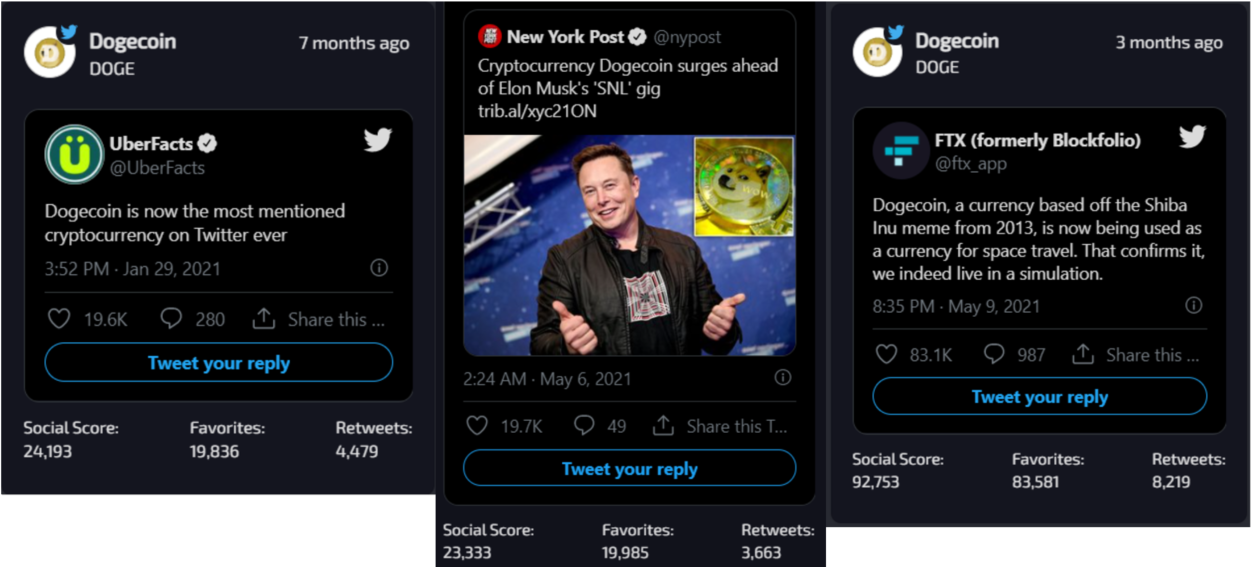

<span style='color:Blue'> Using scatterplots to compare measures of change over time. </span> Using our dataframe which includes the index, plotly is used for subplots to review the change in price and social score activity.

In [117]:
scatter = clean_copy[['time','close','social_score', 'percent_change_24h']] 
scatter.head()   # new dataframe for cols using time as column instead of index

time     close  social_score  percent_change_24h
0  2019-08-26  0.002636     1157472.0            0.841622
1  2019-08-27  0.002606     1332302.0           -1.138088
2  2019-08-28  0.002504      982643.0           -3.914045
3  2019-08-29  0.002436     1681961.0           -2.715655
4  2019-08-30  0.002458      644466.0            0.903120

In [118]:
fig = make_subplots(rows=3, cols=1, subplot_titles=("Close Price", "Social Score", "Daily % Change in Price"))
fig.append_trace(go.Scatter(
    x=scatter['time'],
    y=scatter['close'],
    mode='markers', marker=dict(size=3)), 
    row=1, col=1,)

fig.append_trace(go.Scatter(
    x=scatter['time'],
    y=scatter['social_score'],
    mode='markers', marker=dict(size=3)),
    row=2, col=1)

fig.append_trace(go.Scatter(
    x=scatter['time'],
    y=scatter['percent_change_24h'],
    mode='markers', marker=dict(size=3)),
    row=3, col=1)

# subplots for scatterplot comparison
fig.update_layout(height=900, width=800, title_text="Change Comparisons", showlegend=False) 

#### Key Indicators - Correlation

* Social volume and tweets used in addition to social score as indicators of social media engagement for Dogecoin
* Heatmap used to view the correlation amongst categories, including tweets, social score, and social volume to close price
* All correlations can be considered moderate to strong or very strong, table for reference for relative correlation strength. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/

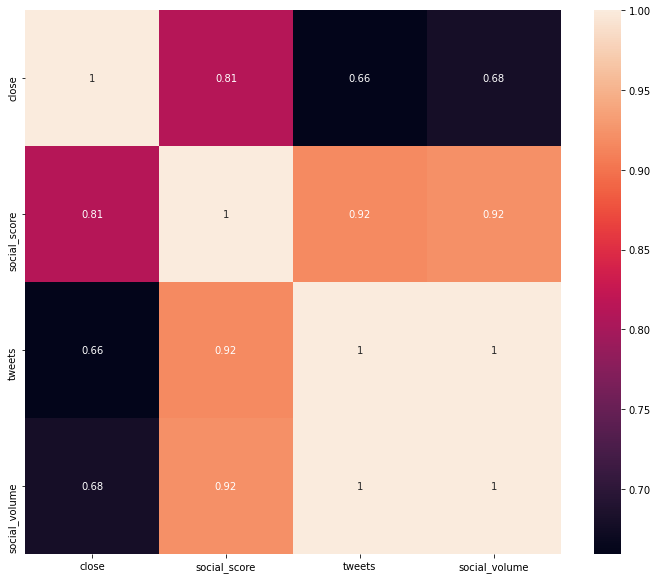

In [119]:
plt.figure(figsize=(12,10))
matrix = clean_doge[['close','social_score','tweets','social_volume']].corr()
sns.heatmap(matrix, annot=True);
# heatmap shows relative correlation across columns
# correlation of 1 for same column and row cross comparison
# semicolon included at the end to remove axes suplot header

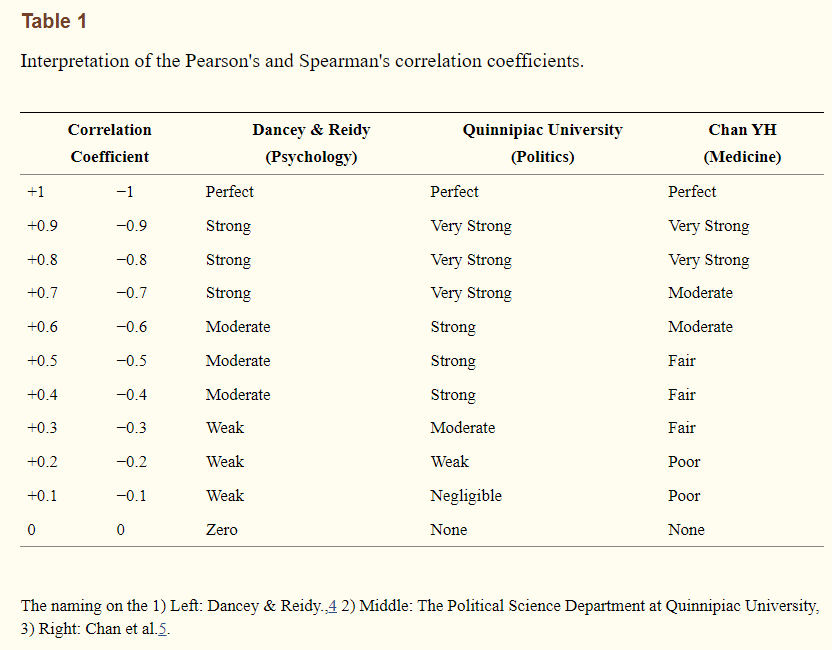

## Thanks for reading, we hope you enjoyed!